# Preprocessing and clustering

## Loading import

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy import sparse
import os
from anndata.experimental.multi_files import AnnCollection
from matplotlib.pyplot import rc_context
import matplotlib as mpl
# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(3, 3), facecolor='white')
sc.settings.set_figure_params(frameon=False, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 louvain==0.7.1 pynndescent==0.5.4


In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## Input data

In [4]:
wdir = "/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/04_Cell_Atlas/"
os.chdir( wdir )

In [5]:
adata = sc.read_h5ad('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_01_louvain_umap_20231028.h5ad')

In [6]:
adata.obs['sample'] = adata.obs['batch'].replace(
    ['Col_N_1', 'Col_T_1', 'Col_N_2', 'Col_T_2', 'Col_N_3', 'Col_T_3', 'Col_T_4', 'Col_T_5', 'Col_T_6', 'Liv_N_1', 
     'Liv_T_1', 'Liv_N_2', 'Liv_N_3', 'Liv_N_4', 'Liv_T_4', 'Liv_N_5', 'Liv_T_6', 'Liv_N_7', 'Liv_T_8_1', 'Liv_T_8_2', 
     'Liv_N_9', 'Liv_T_9', 'Liv_T_10', 'Liv_N_11', 'Liv_T_11', 'Liv_T_12',
    ],
    ['Col_N', 'Col_T', 'Col_N', 'Col_T', 'Col_N', 'Col_T', 'Col_T', 'Col_T', 'Col_T', 'Liv_N', 
     'Liv_T', 'Liv_N', 'Liv_N', 'Liv_N', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_T', 
     'Liv_N', 'Liv_T', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_T',
    ])

In [7]:
adata

AnnData object with n_obs × n_vars = 56163 × 13401
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'n_genes', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts_all', 'umap_density_batch', 'louvain', 'sample'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'ribo', 'hb', 'log1p_mean_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'batch_colors', 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap', 'umap_density_batch_params'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs.head(5)

batch  n_genes_by_counts  total_counts  n_genes  \
AAAGGGCTCTGCAGCG-1  Col_N_1               1464        6027.0     1464   
AAAGTGAGTCCATACA-1  Col_N_1                965        2267.0      966   
AAAGTGATCGACCACG-1  Col_N_1                727        1730.0      727   
AAAGTGATCTGCATGA-1  Col_N_1                610        1206.0      610   
AACAACCTCAGCTTCC-1  Col_N_1               1718        4330.0     1718   

                    log1p_n_genes_by_counts  log1p_total_counts  \
AAAGGGCTCTGCAGCG-1                 7.289611            8.704170   
AAAGTGAGTCCATACA-1                 6.873164            7.726654   
AAAGTGATCGACCACG-1                 6.590301            7.456455   
AAAGTGATCTGCATGA-1                 6.415097            7.095893   
AACAACCTCAGCTTCC-1                 7.449498            8.373553   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAAGGGCTCTGCAGCG-1                   29.766053            477.0   
AAAGTGAGTCCATACA-1                   20.776356            226.0   
AAAGTGATCGACCACG-1                   31.734104            140.0   
AAAGTGATCTGCATGA-1                   21.890547             67.0   
AACAACCTCAGCTTCC-1                   23.602771            321.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAAGGGCTCTGCAGCG-1               6.169611       7.914385             2692.0   
AAAGTGAGTCCATACA-1               5.424950       9.969122              420.0   
AAAGTGATCGACCACG-1               4.948760       8.092485               42.0   
AAAGTGATCTGCATGA-1               4.219508       5.555556              386.0   
AACAACCTCAGCTTCC-1               5.774551       7.413395              756.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAAGGGCTCTGCAGCG-1                 7.898411        44.665672              0.0   
AAAGTGAGTCCATACA-1                 6.042633        18.526688              2.0   
AAAGTGATCGACCACG-1                 3.761200         2.427746              1.0   
AAAGTGATCTGCATGA-1                 5.958425        32.006634              0.0   
AACAACCTCAGCTTCC-1                 6.629363        17.459585              0.0   

                    log1p_total_counts_hb  pct_counts_hb  n_counts_all  \
AAAGGGCTCTGCAGCG-1               0.000000       0.000000   1337.232178   
AAAGTGAGTCCATACA-1               1.098612       0.088222   1431.658691   
AAAGTGATCGACCACG-1               0.693147       0.057803   1357.053833   
AAAGTGATCTGCATGA-1               0.000000       0.000000   1002.002014   
AACAACCTCAGCTTCC-1               0.000000       0.000000   1959.104736   

                    umap_density_batch louvain sample  
AAAGGGCTCTGCAGCG-1            0.378650       6  Col_N  
AAAGTGAGTCCATACA-1            0.028019       9  Col_N  
AAAGTGATCGACCACG-1            0.898012      17  Col_N  
AAAGTGATCTGCATGA-1            0.292703       6  Col_N  
AACAACCTCAGCTTCC-1            0.160171       4  Col_N

In [9]:
# sc.pp.highly_variable_genes(adata_all, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pl.highly_variable_genes(adata_all, show=True)
# adata_all.raw = adata_all
# adata = adata_all[:, adata_all.var.highly_variable]

## Annotation

In [10]:
adata.obs['louvain_anno'] = adata.obs['louvain'].replace(
    ['0', '1', '2', '3', '4', 
    '5', '6', '7', '8', '9', 
    '10', '11', '12', '13', '14', 
    '15', '16', '17', '18', '19',
    '20', '21', '22'
    ],
    ['T cells', 'T cells', 'T cells', 'Myeloid cells', 'NK cells', 
    'Epithelial cells', 'T cells', 'T cells', 'Myeloid cells', 'Endothelial cells', 
    'T cells', 'B cells', 'NK cells', 'T cells', 'Plasma cells', 
    'NK cells', 'B cells', 'Epithelial cells', 'Fibroblast cells', 'Fibroblast cells',
    'Mast cells', 'Epithelial cells', 'Epithelial cells'
    ])

In [11]:
adata.obs.head(5)

batch  n_genes_by_counts  total_counts  n_genes  \
AAAGGGCTCTGCAGCG-1  Col_N_1               1464        6027.0     1464   
AAAGTGAGTCCATACA-1  Col_N_1                965        2267.0      966   
AAAGTGATCGACCACG-1  Col_N_1                727        1730.0      727   
AAAGTGATCTGCATGA-1  Col_N_1                610        1206.0      610   
AACAACCTCAGCTTCC-1  Col_N_1               1718        4330.0     1718   

                    log1p_n_genes_by_counts  log1p_total_counts  \
AAAGGGCTCTGCAGCG-1                 7.289611            8.704170   
AAAGTGAGTCCATACA-1                 6.873164            7.726654   
AAAGTGATCGACCACG-1                 6.590301            7.456455   
AAAGTGATCTGCATGA-1                 6.415097            7.095893   
AACAACCTCAGCTTCC-1                 7.449498            8.373553   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAAGGGCTCTGCAGCG-1                   29.766053            477.0   
AAAGTGAGTCCATACA-1                   20.776356            226.0   
AAAGTGATCGACCACG-1                   31.734104            140.0   
AAAGTGATCTGCATGA-1                   21.890547             67.0   
AACAACCTCAGCTTCC-1                   23.602771            321.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAAGGGCTCTGCAGCG-1               6.169611       7.914385             2692.0   
AAAGTGAGTCCATACA-1               5.424950       9.969122              420.0   
AAAGTGATCGACCACG-1               4.948760       8.092485               42.0   
AAAGTGATCTGCATGA-1               4.219508       5.555556              386.0   
AACAACCTCAGCTTCC-1               5.774551       7.413395              756.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAAGGGCTCTGCAGCG-1                 7.898411        44.665672              0.0   
AAAGTGAGTCCATACA-1                 6.042633        18.526688              2.0   
AAAGTGATCGACCACG-1                 3.761200         2.427746              1.0   
AAAGTGATCTGCATGA-1                 5.958425        32.006634              0.0   
AACAACCTCAGCTTCC-1                 6.629363        17.459585              0.0   

                    log1p_total_counts_hb  pct_counts_hb  n_counts_all  \
AAAGGGCTCTGCAGCG-1               0.000000       0.000000   1337.232178   
AAAGTGAGTCCATACA-1               1.098612       0.088222   1431.658691   
AAAGTGATCGACCACG-1               0.693147       0.057803   1357.053833   
AAAGTGATCTGCATGA-1               0.000000       0.000000   1002.002014   
AACAACCTCAGCTTCC-1               0.000000       0.000000   1959.104736   

                    umap_density_batch louvain sample       louvain_anno  
AAAGGGCTCTGCAGCG-1            0.378650       6  Col_N            T cells  
AAAGTGAGTCCATACA-1            0.028019       9  Col_N  Endothelial cells  
AAAGTGATCGACCACG-1            0.898012      17  Col_N   Epithelial cells  
AAAGTGATCTGCATGA-1            0.292703       6  Col_N            T cells  
AACAACCTCAGCTTCC-1            0.160171       4  Col_N           NK cells

In [12]:
adata.obs['louvain_anno'].cat.categories

Index(['T cells', 'Myeloid cells', 'NK cells', 'Epithelial cells',
       'Endothelial cells', 'B cells', 'Plasma cells', 'Fibroblast cells',
       'Mast cells'],
      dtype='object')

In [13]:
adata.obs['louvain_anno'].cat.reorder_categories(
    ['T cells', 'NK cells', 'Myeloid cells', 'Mast cells', 'B cells', 'Plasma cells', 'Epithelial cells', 'Fibroblast cells', 'Endothelial cells'], inplace=True, ordered=True)

/var/folders/nt/95vmy3614zd_8x3sv2ktwn7c0000gp/T/ipykernel_59107/4158033302.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['louvain_anno'].cat.reorder_categories(


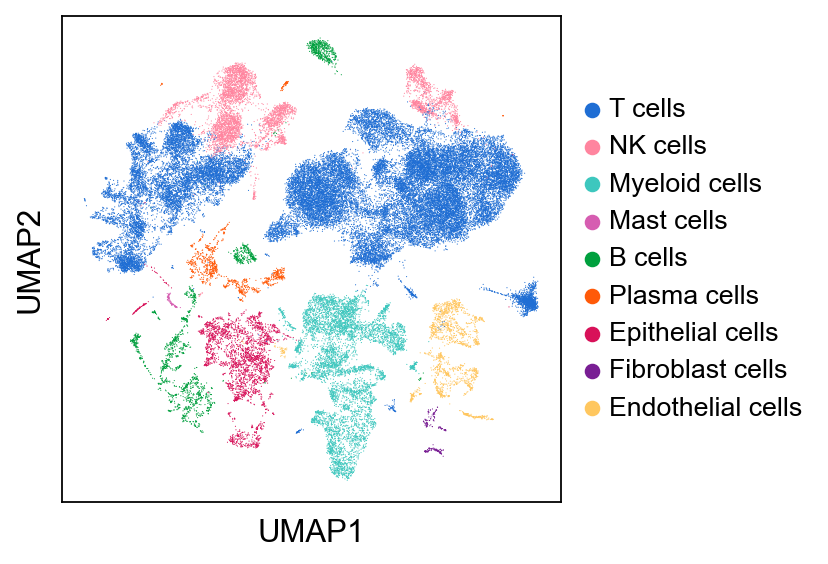

In [14]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['louvain_anno'], title='', size=1, legend_fontsize=12, legend_loc='right margin', 
    palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], frameon=True, show=True, save='_01_louvain_anno.pdf')

In [15]:
# with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
#     sc.pl.tsne(adata, color=['louvain_anno'], title='', size=1, legend_fontsize=12, legend_loc='right margin', 
#     palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], frameon=True, show=True, save='_01_louvain_anno.pdf')

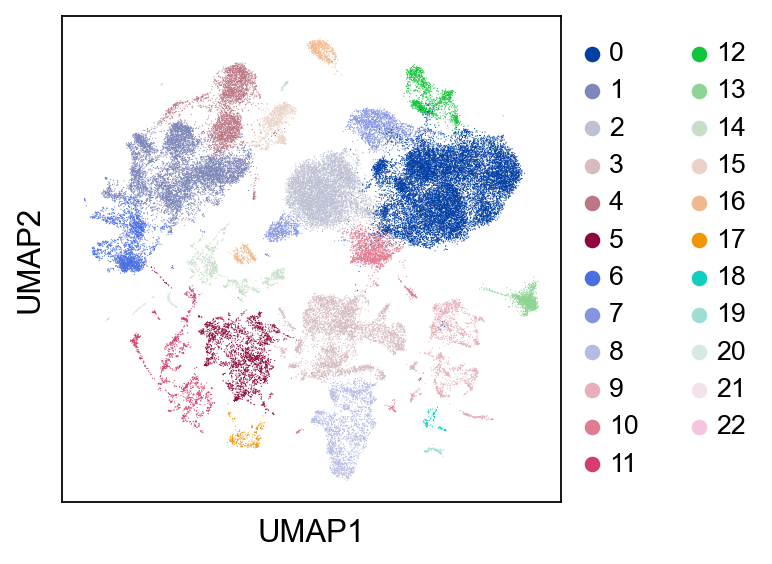

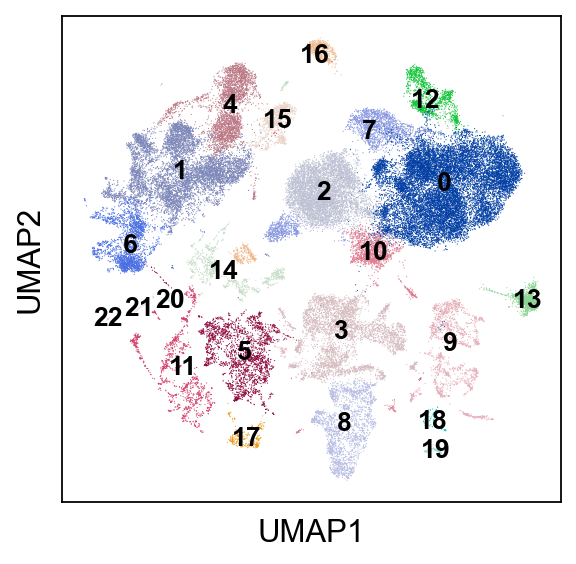

In [16]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color = ['louvain'], title='', size=1, legend_fontsize=12, legend_loc='right margin', frameon=True, show=True, save='_02_louvain.pdf')
    sc.pl.umap(adata, color = ['louvain'], title='', size=1, legend_loc='on data', legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_02_louvain_num.pdf")

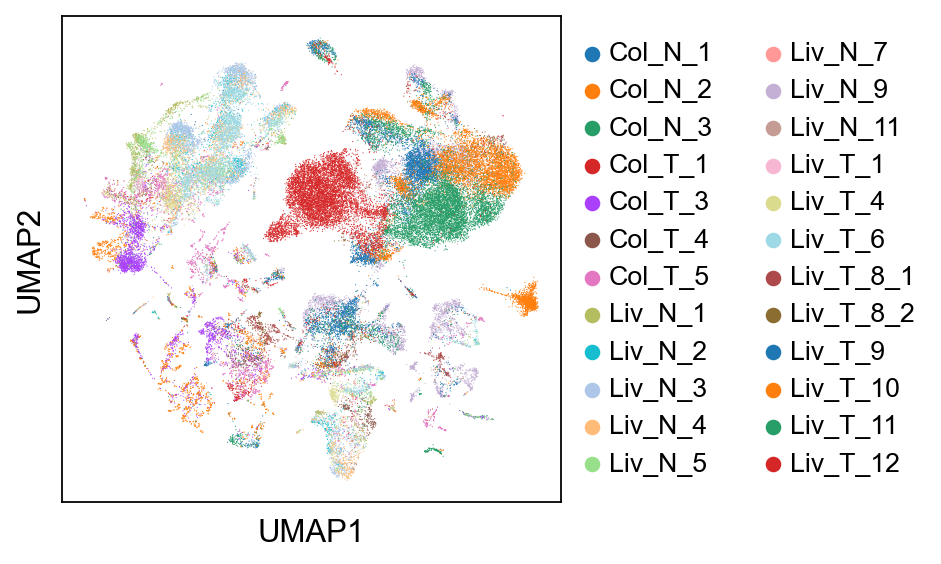

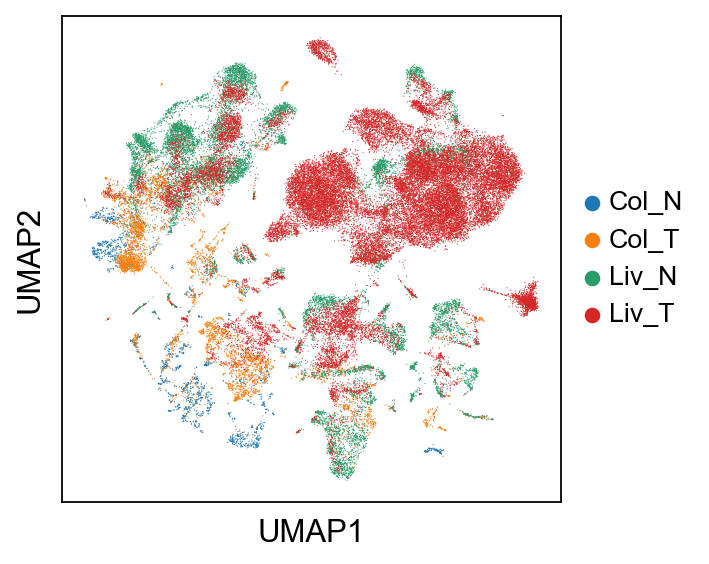

In [17]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['batch'], title='', size=1, legend_fontsize=12, legend_loc='right margin', frameon=True, show=True, save='_03_batch.pdf')
    sc.pl.umap(adata, color=['sample'], title='', size=1, legend_fontsize=12, legend_loc='right margin', frameon=True, show=True, save='_03_sample.pdf')

In [18]:
marker_genes_dict = {
    'T cells': ['CD2', 'CD3D', 'CD3E'],
    'NK cells': ['NKG7', 'KLRD1', 'PRF1'],
    'Myeloid cells': ['S100A9', 'CD14', 'CD68'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    'B cells': ['CD79A', 'MS4A1', 'CD79B'],
    'Plasma cells': ['MZB1', 'IGHA2', 'DERL3'],
    'Epithelial cells': ['EPCAM', 'KRT18', 'KRT19'],
    'Fibroblast cells': ['DCN', 'COL1A1', 'COL1A2'],
    'Endothelial cells': ['CLDN5', 'VWF', 'PECAM1'],    
}

In [19]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#845EC2')], N=256)

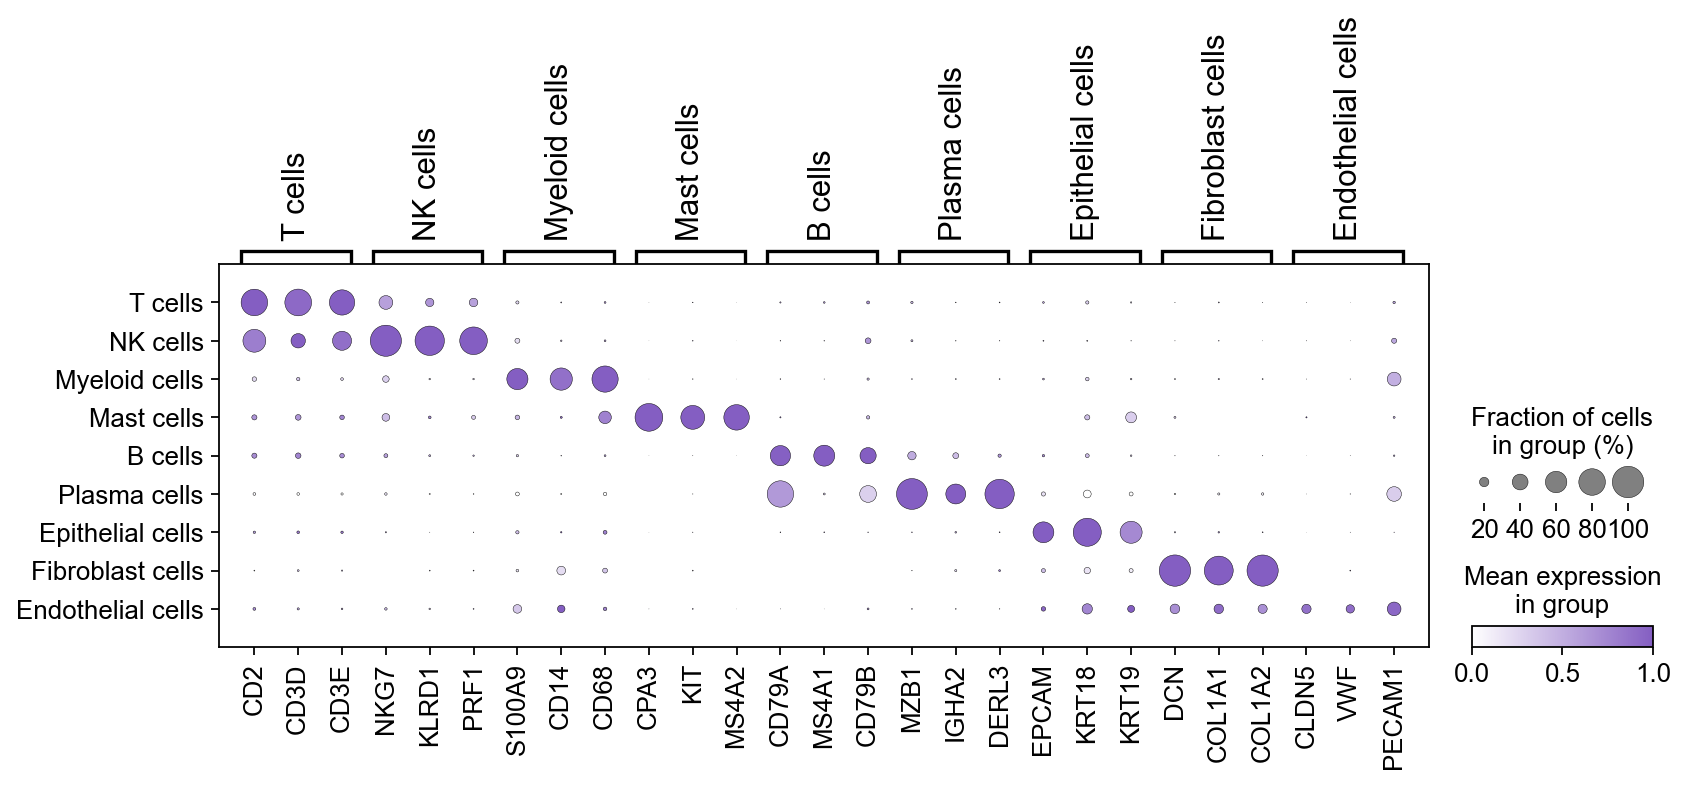

In [20]:
## dotplot of gene expression
with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.dotplot(adata, marker_genes_dict, groupby='louvain_anno', cmap=color_loc_1, swap_axes=False, dendrogram=False, 
    mean_only_expressed=True, standard_scale='var', show=True)

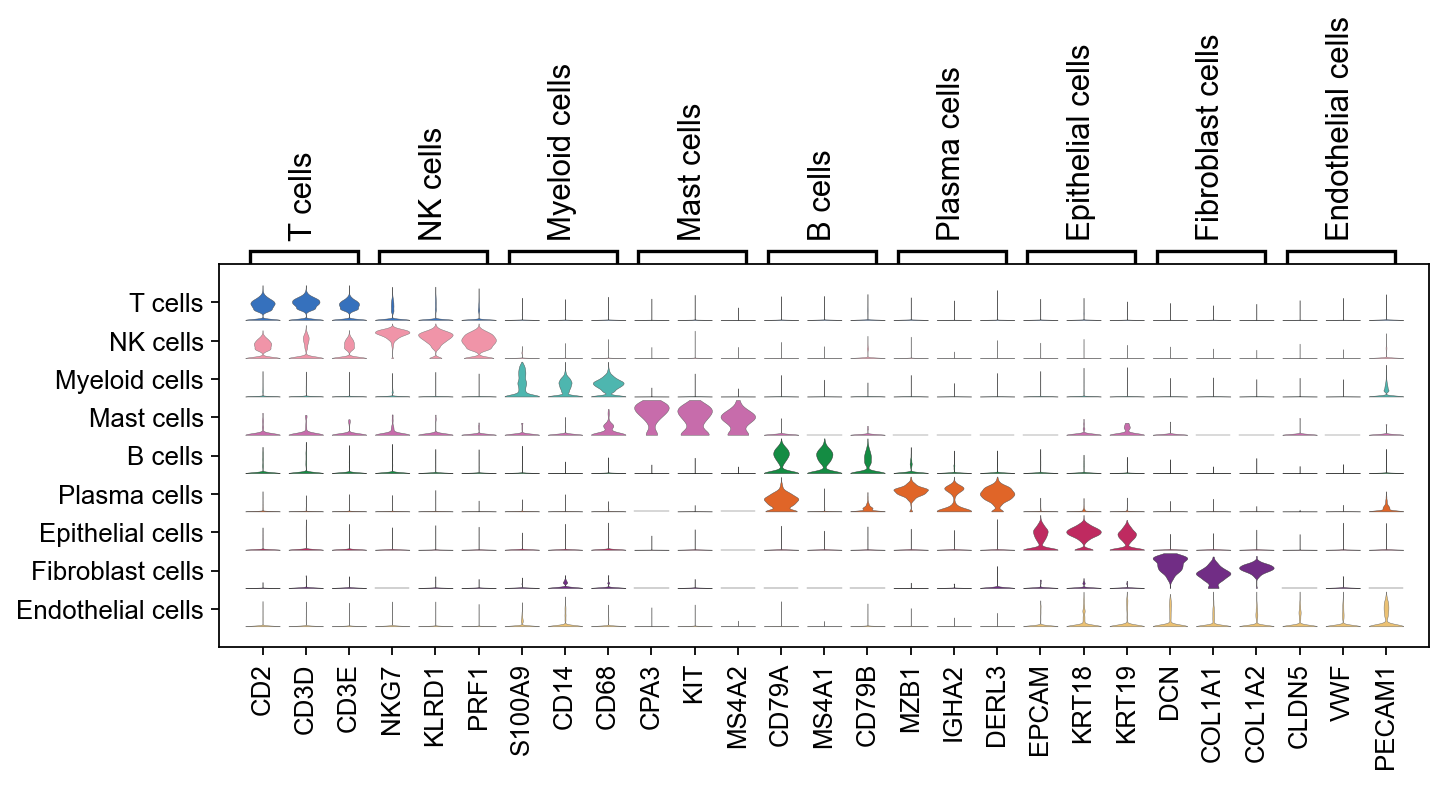

In [21]:
## Violin of gene expression
with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain_anno', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0,
    row_palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], vmax=1, vmin=-1, 
    standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True)

In [22]:
# with rc_context({'figure.figsize': (4, 4), 'figure.facecolor': '#FFFFFF', 'savefig.dpi': '300'}):
#     sc.pl.umap(adata, color=['louvain'], title='', size=1, legend_fontsize=12, frameon=True, show=True, save='_01_all.pdf')

# with rc_context({'figure.figsize': (4, 4), 'figure.facecolor': '#FFFFFF', 'savefig.dpi': '300'}):
#     sc.pl.umap(adata, color=['patient'], title='', size=1, legend_fontsize=12, frameon=True, show=True, save='_01_patient.pdf')

In [23]:
adata.write_h5ad('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_04_Cell_Atlas.h5ad')

## Violin plots showing the smoothed expression distribution of marker genes

In [24]:
pd.Series(adata.obs['louvain_anno']).unique()

['T cells', 'Endothelial cells', 'Epithelial cells', 'NK cells', 'B cells', 'Plasma cells', 'Fibroblast cells', 'Myeloid cells', 'Mast cells']
Categories (9, object): ['T cells' < 'NK cells' < 'Myeloid cells' < 'Mast cells' ... 'Plasma cells' < 'Epithelial cells' < 'Fibroblast cells' < 'Endothelial cells']

In [25]:
adata.obs['louvain_anno'].cat.reorder_categories(
    ['T cells', 'NK cells', 'Myeloid cells', 'Mast cells', 'B cells', 'Plasma cells', 'Epithelial cells', 'Fibroblast cells', 'Endothelial cells'], inplace=True, ordered=True)
adata.obs['louvain_anno'].cat.categories

/var/folders/nt/95vmy3614zd_8x3sv2ktwn7c0000gp/T/ipykernel_59107/1158473974.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['louvain_anno'].cat.reorder_categories(


Index(['T cells', 'NK cells', 'Myeloid cells', 'Mast cells', 'B cells',
       'Plasma cells', 'Epithelial cells', 'Fibroblast cells',
       'Endothelial cells'],
      dtype='object')

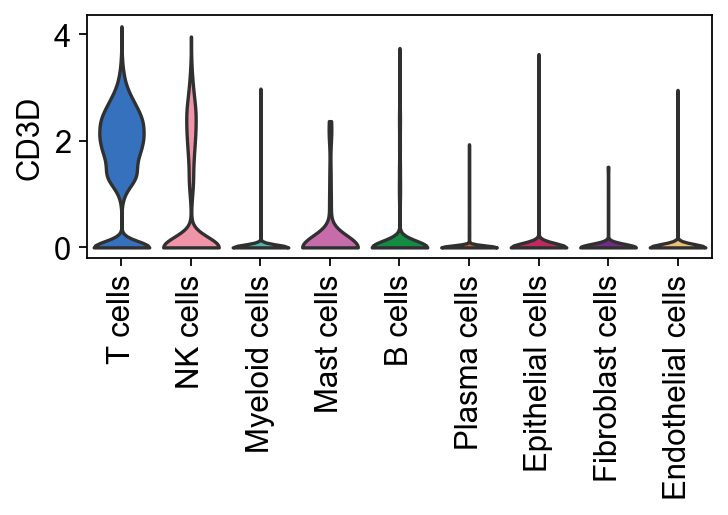

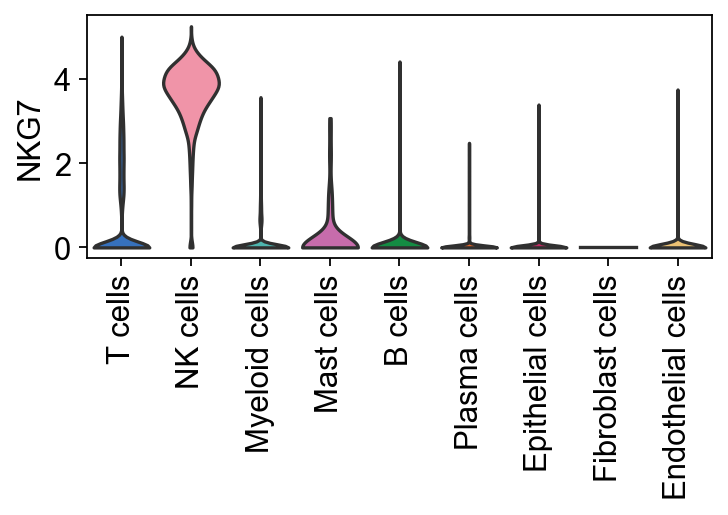

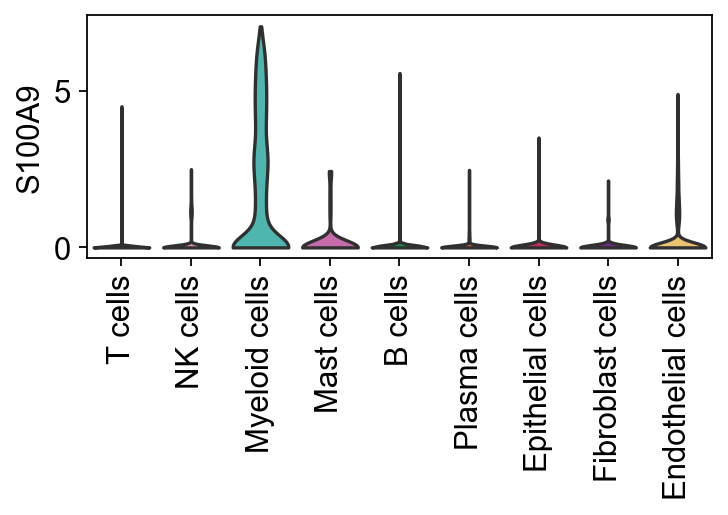

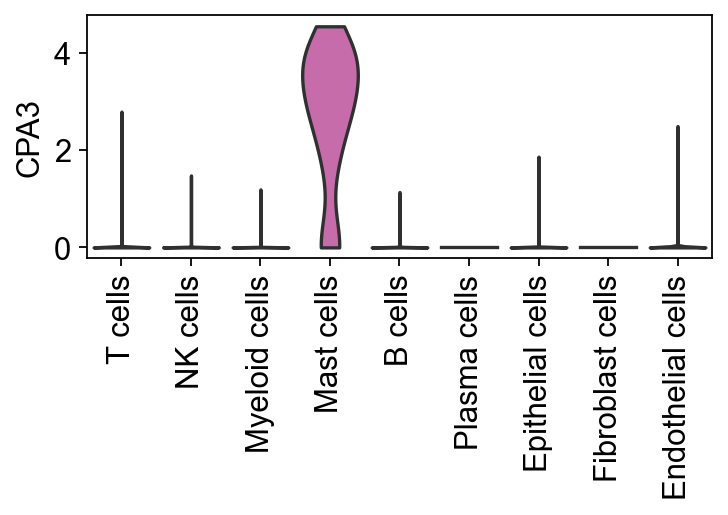

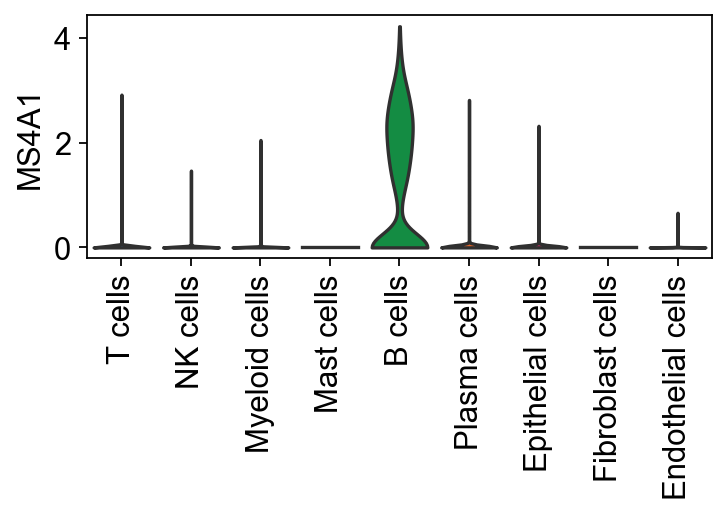

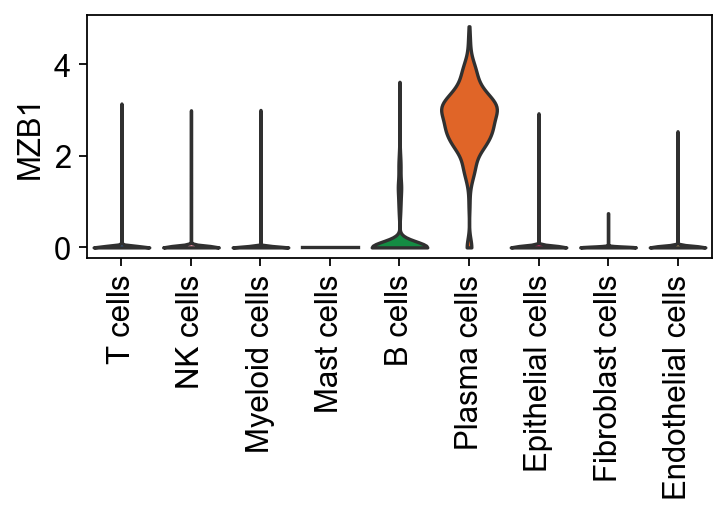

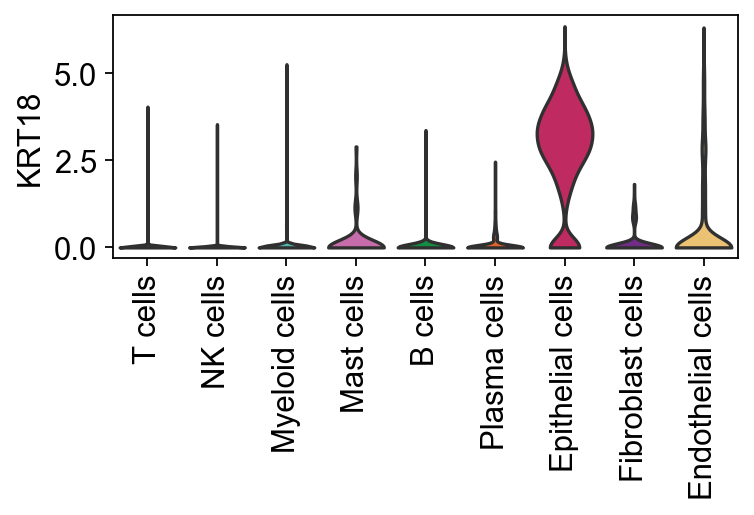

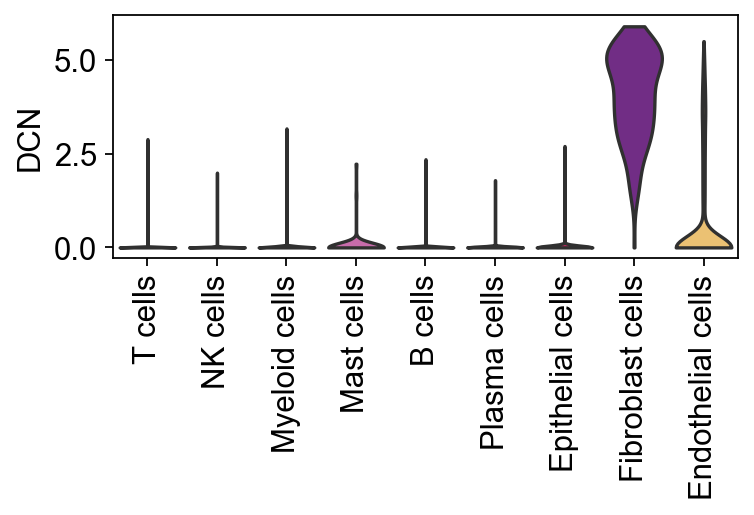

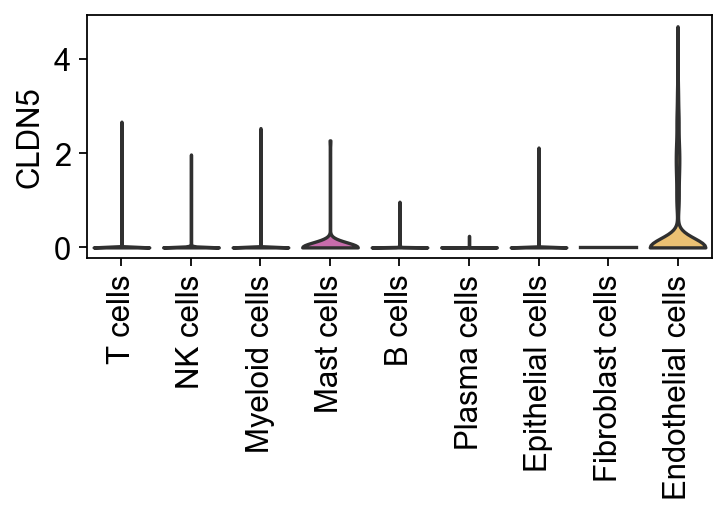

In [26]:
with rc_context({'figure.figsize': (5, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata, ['CD3D'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_01_CD3D_v1.pdf")
    sc.pl.violin(adata, ['NKG7'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_02_NKG7_v1.pdf")
    sc.pl.violin(adata, ['S100A9'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_03_S100A9_v1.pdf")
    sc.pl.violin(adata, ['CPA3'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_04_CPA3_v1.pdf")
    sc.pl.violin(adata, ['MS4A1'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_05_MS4A1_v1.pdf")
    sc.pl.violin(adata, ['MZB1'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_06_MZB1_v1.pdf")
    sc.pl.violin(adata, ['KRT18'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_07_KRT18_v1.pdf")
    sc.pl.violin(adata, ['DCN'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_08_DCN_v1.pdf")
    sc.pl.violin(adata, ['CLDN5'], groupby='louvain_anno', stripplot=False, strip=False, jitter=0, rotation=90, swap_axes=True, mean_only_expressed=True, show=True, save="_annotation_09_CLDN5_v1.pdf")

## Matrixplot of marker genes

In [27]:
pd.Series(adata.obs['louvain_anno']).unique()

['T cells', 'Endothelial cells', 'Epithelial cells', 'NK cells', 'B cells', 'Plasma cells', 'Fibroblast cells', 'Myeloid cells', 'Mast cells']
Categories (9, object): ['T cells' < 'NK cells' < 'Myeloid cells' < 'Mast cells' ... 'Plasma cells' < 'Epithelial cells' < 'Fibroblast cells' < 'Endothelial cells']

In [28]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#FD7013')], N=256)

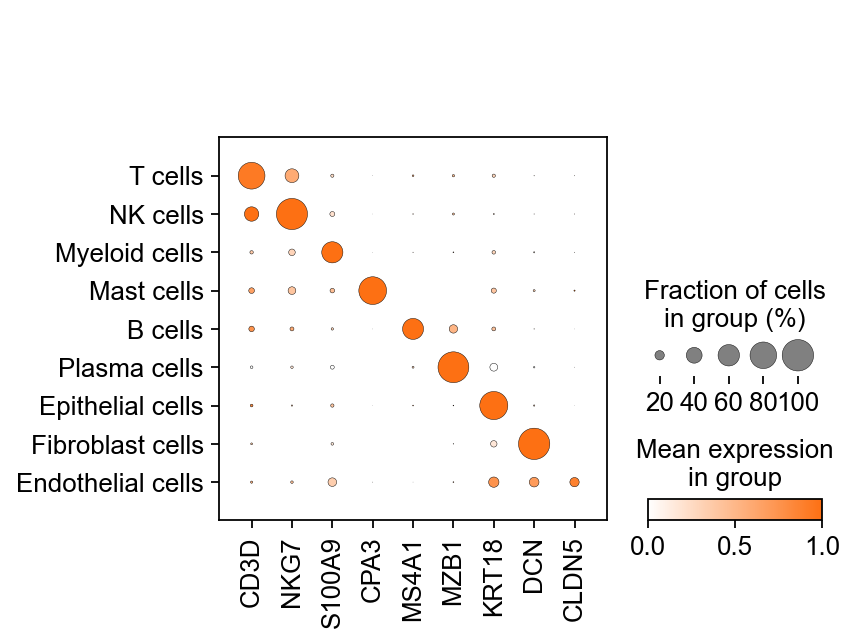

In [29]:
with rc_context({'figure.figsize': (6, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.dotplot(adata, [
        'CD3D', # T cells
        'NKG7', # NK cells
        'S100A9', # Myeloid cells
        'CPA3', # Mast cells
        'MS4A1', # B cells
        'MZB1', # Plasma cells 
        'KRT18', # Epithelial cells
        'DCN', # Fibroblast cells
        'CLDN5', # Endothelial cells
    ], groupby='louvain_anno', mean_only_expressed=True, cmap=color_loc_1, dendrogram=False, standard_scale='var', title='', show=True, save="01_marker.pdf")

In [30]:
marker_genes_dict = {
    'T cells': ['CD2', 'CD3D', 'CD3E'],
    'NK cells': ['NKG7', 'KLRD1', 'GNLY'],
    'Myeloid cells': ['S100A9', 'CD14', 'CD68'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    'B cells': ['CD79A', 'MS4A1', 'CD79B'],
    'Plasma cells': ['MZB1', 'IGHA2', 'DERL3'],
    'Epithelial cells': ['EPCAM', 'KRT18', 'KRT19'],
    'Fibroblast cells': ['DCN', 'COL1A1', 'COL1A2'],
    'Endothelial cells': ['CLDN5', 'VWF', 'RAMP2'],    
}

In [31]:
adata.uns['louvain_anno_colors']

['#1f6ed4',
 '#ff859f',
 '#3dc7be',
 '#d65db1',
 '#00a03e',
 '#ff5a09',
 '#d81159',
 '#791e94',
 '#ffc75f']

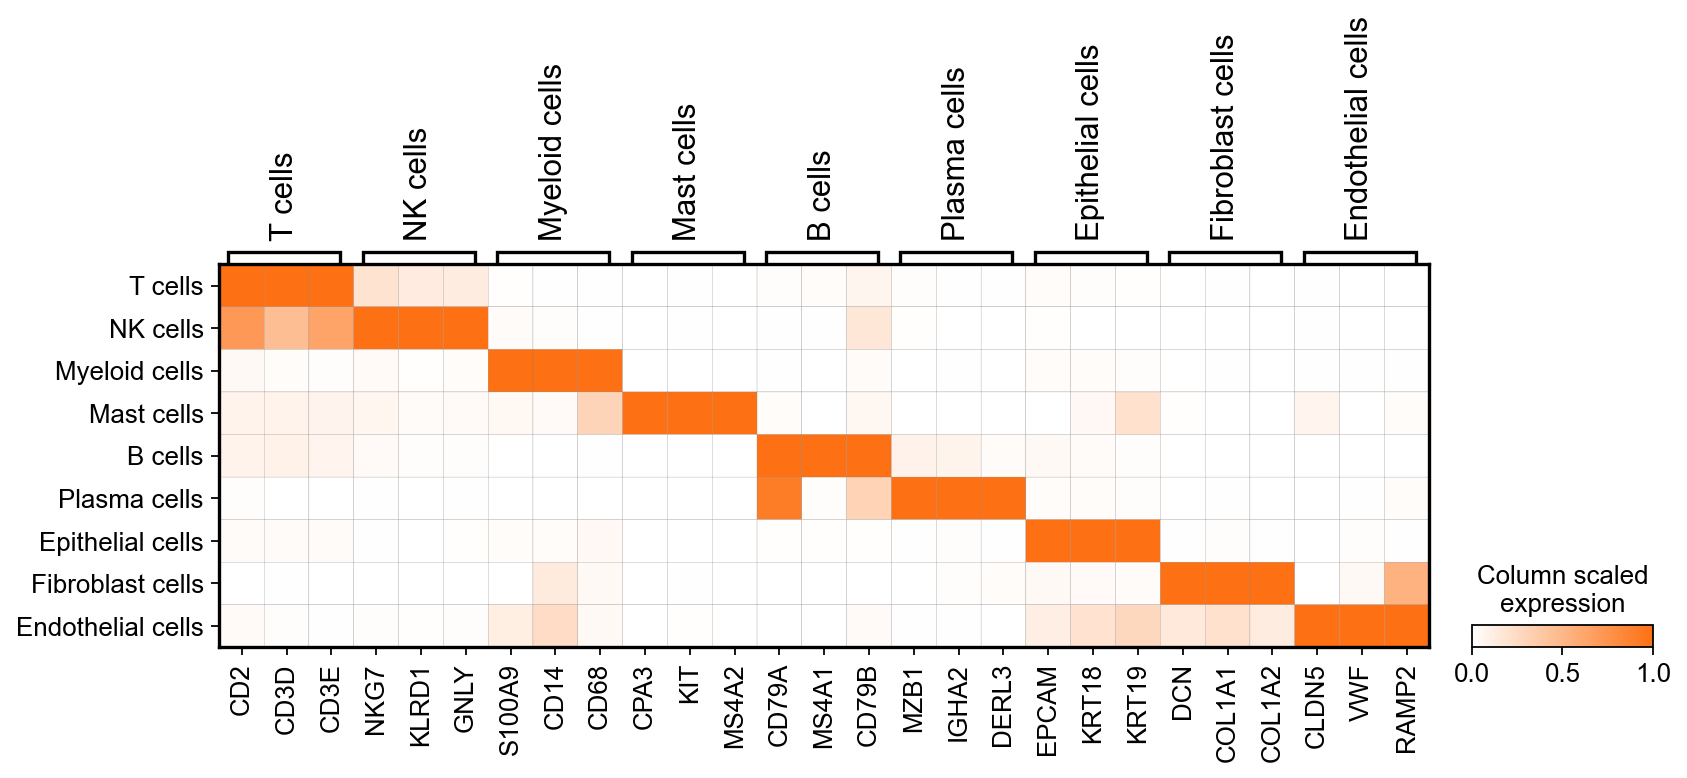

In [32]:
with rc_context({'figure.figsize': (6, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.matrixplot(adata, marker_genes_dict, 'louvain_anno', dendrogram=False, cmap=color_loc_1, standard_scale='var',
    colorbar_title='Column scaled\nexpression', show=True, save="01_annotation_marker_exp_v1.pdf")

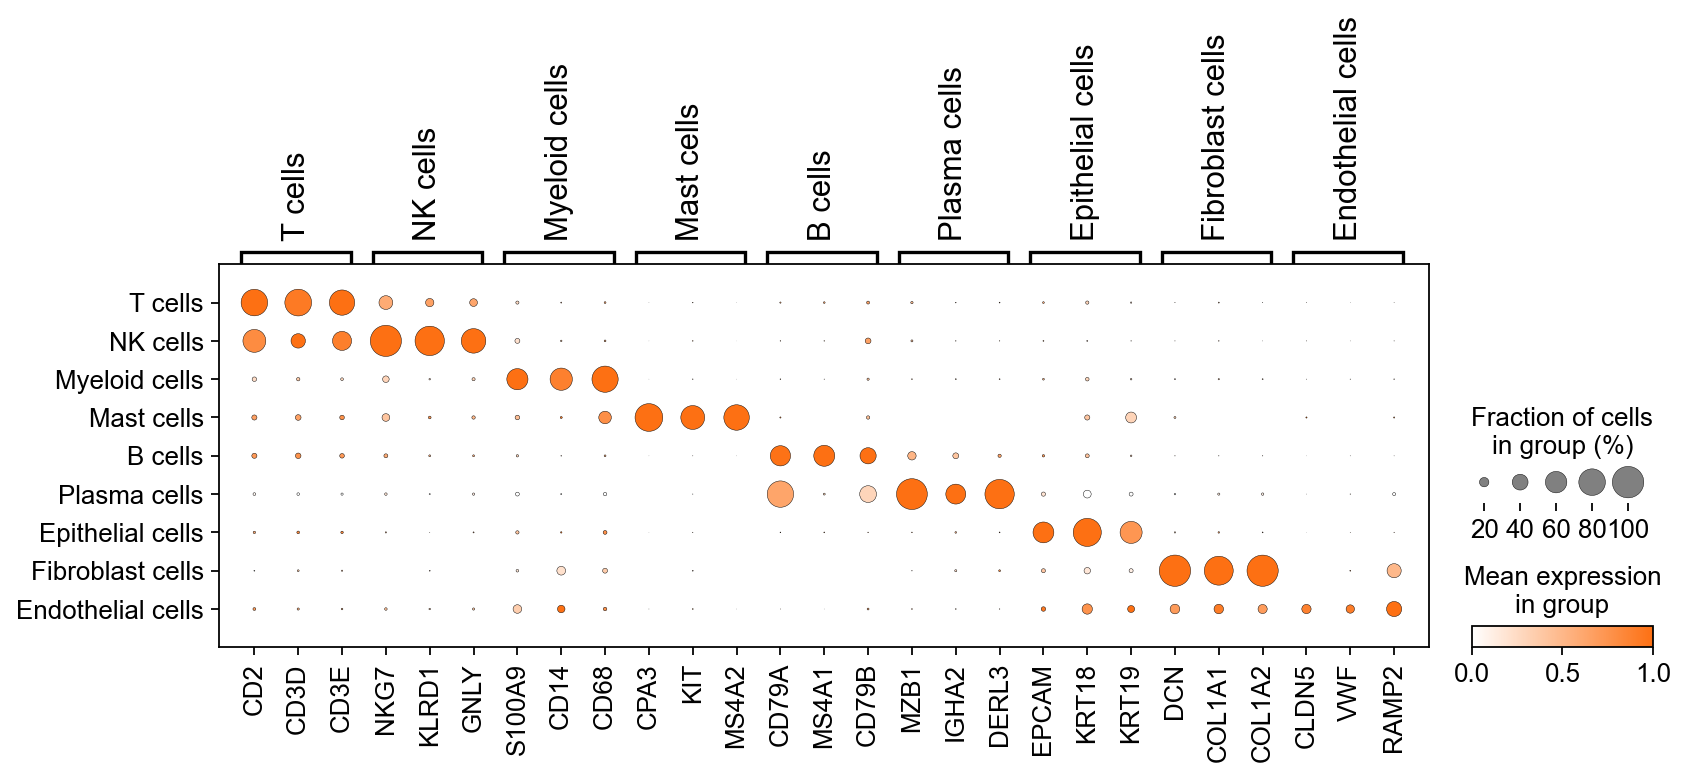

In [33]:
with rc_context({'figure.figsize': (6, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.dotplot(adata, marker_genes_dict, groupby='louvain_anno', cmap=color_loc_1, swap_axes=False, dendrogram=False, 
    mean_only_expressed=True, standard_scale='var', show=True, save="02_annotation_marker_exp_v1.pdf")

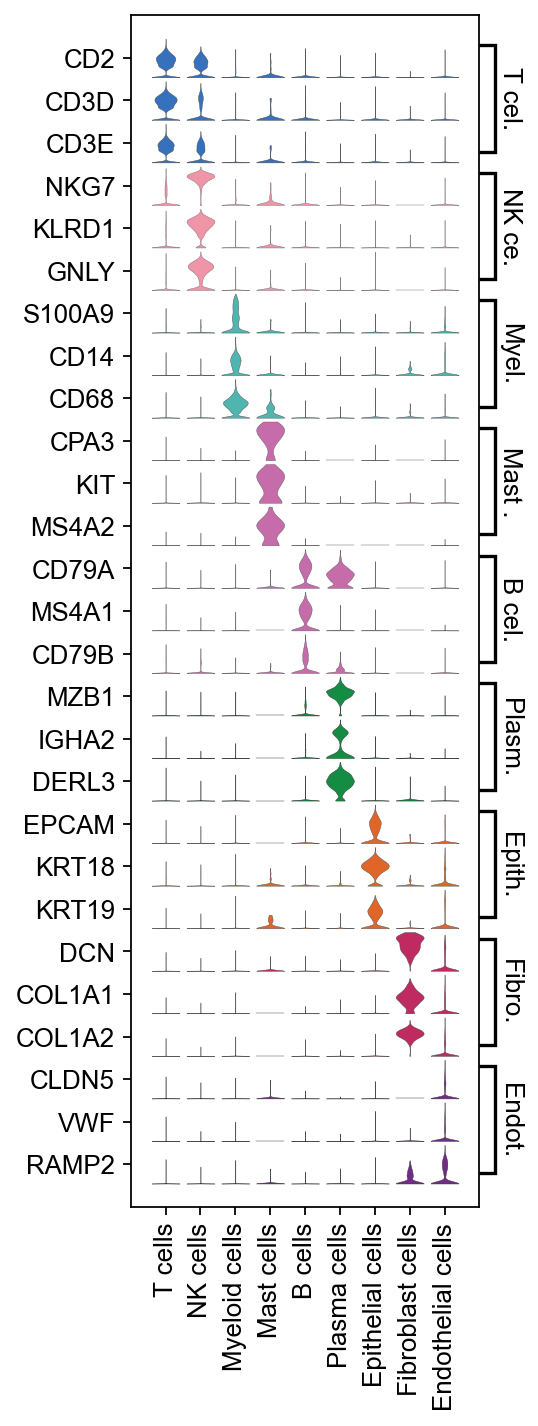

In [34]:
## Violin of gene expression
with rc_context({'figure.figsize': (6, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain_anno', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0,
    row_palette=[
        '#1F6ED4', '#1F6ED4', '#1F6ED4', 
        '#FF859F', '#FF859F', '#FF859F', 
        '#3DC7BE', '#3DC7BE', '#3DC7BE', 
        '#D65DB1', '#D65DB1', '#D65DB1', 
        '#D65DB1', '#D65DB1', '#D65DB1',
        '#00a03e', '#00a03e', '#00a03e', 
        '#FF5A09', '#FF5A09', '#FF5A09', 
        '#D81159', '#D81159', '#D81159', 
        '#791E94', '#791E94', '#791E94', 
        '#FFC75F', '#FFC75F', '#FFC75F',
        ], vmax=1, vmin=-1, 
    standard_scale='var', mean_only_expressed=True, swap_axes=True, dendrogram=False, show=True, save="01_annotation_marker_exp_v1.pdf")

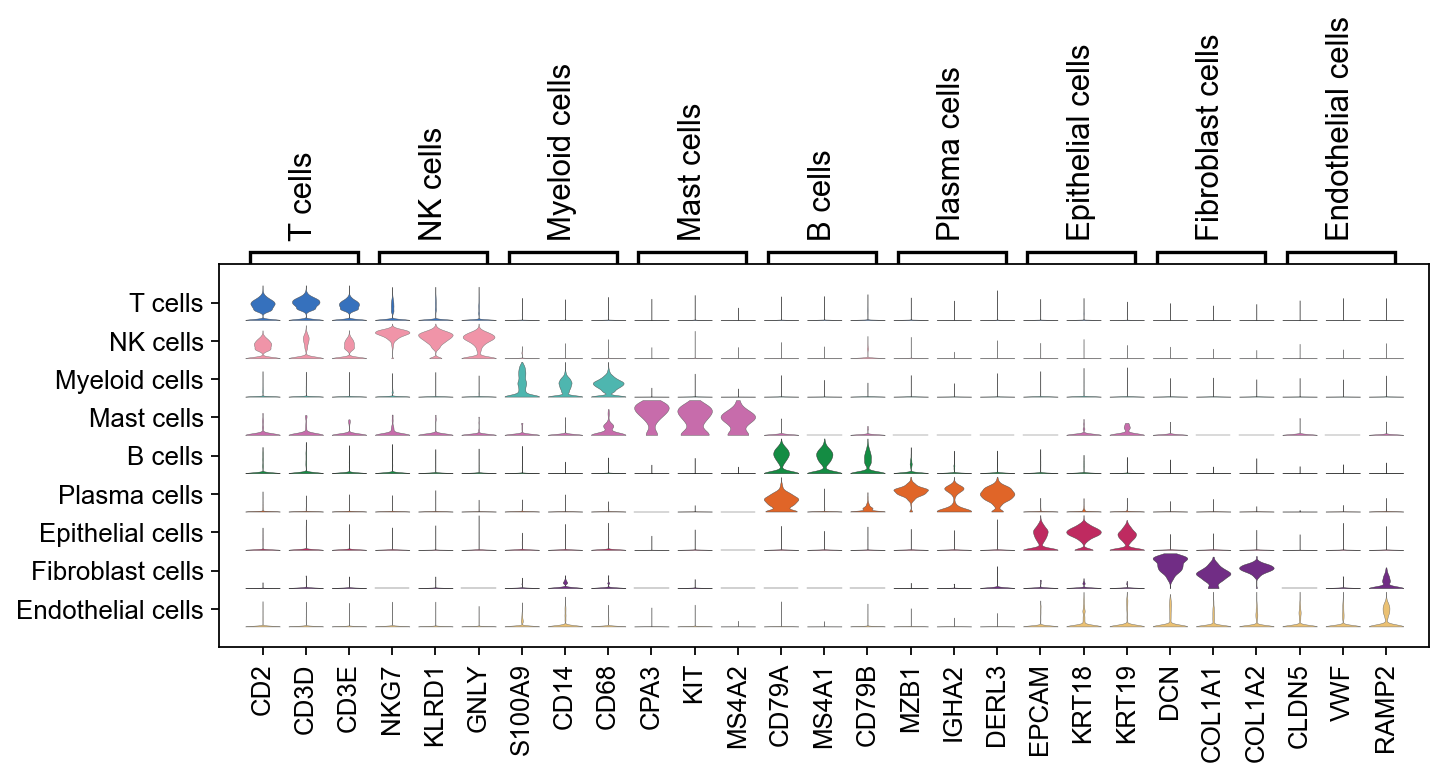

In [35]:
## Violin of gene expression
with rc_context({'figure.figsize': (12, 12), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain_anno', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0,
    row_palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], vmax=1, vmin=-1, 
    standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="01_annotation_marker_exp_v2.pdf")

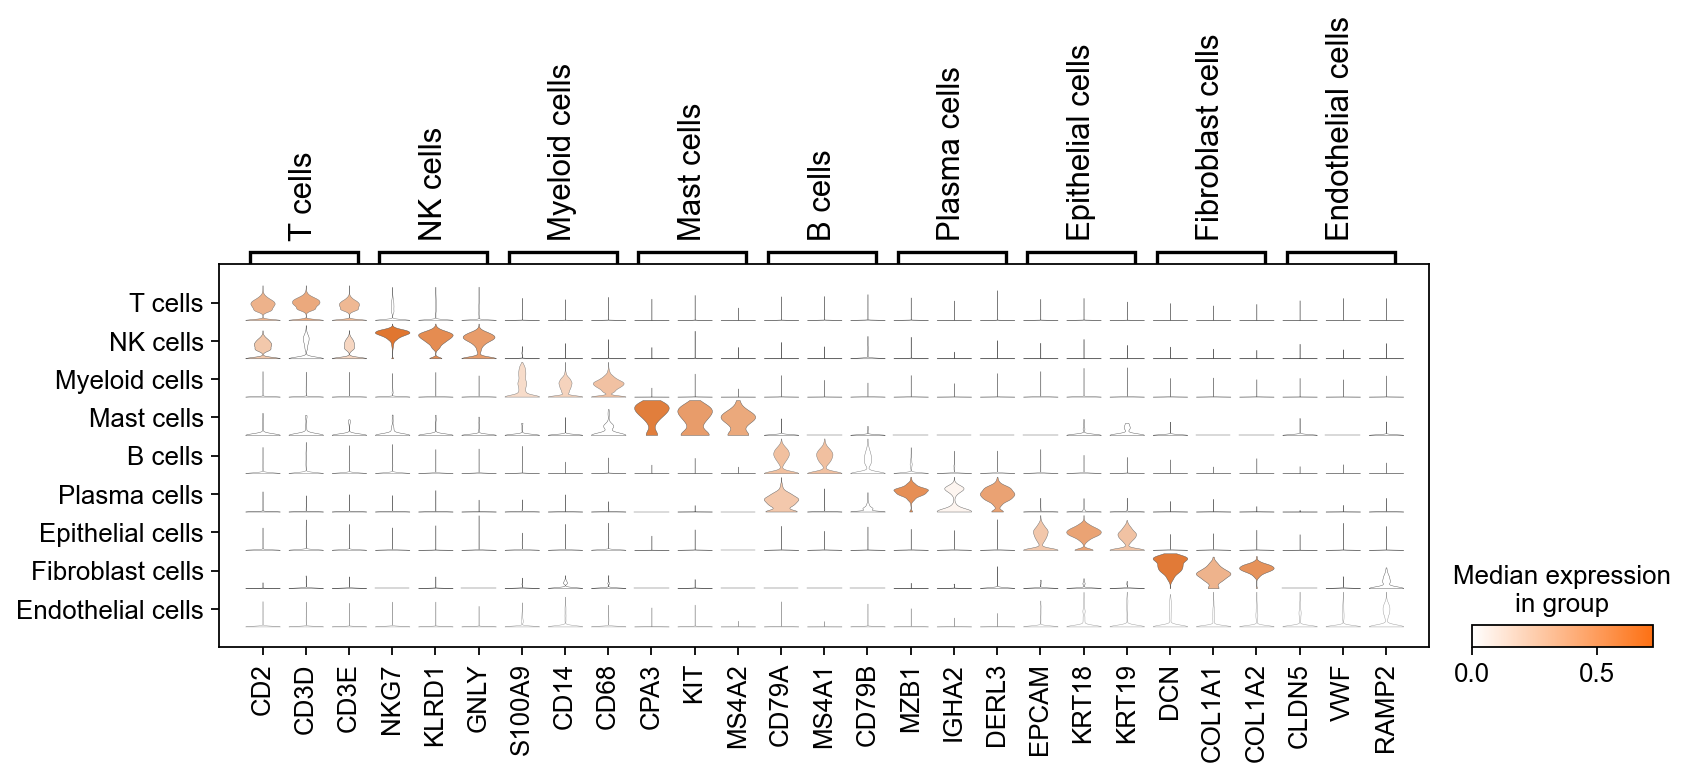

In [36]:
with rc_context({'figure.figsize': (12, 12), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain_anno', cmap=color_loc_1, var_group_rotation=90, rotation=0,
    standard_scale='var', swap_axes=False, show=True, save="01_annotation_marker_exp_v3.pdf")

## Expression of canonical marker genes

In [37]:
adata.uns['louvain_anno_colors']

['#1f6ed4',
 '#ff859f',
 '#3dc7be',
 '#d65db1',
 '#00a03e',
 '#ff5a09',
 '#d81159',
 '#791e94',
 '#ffc75f']

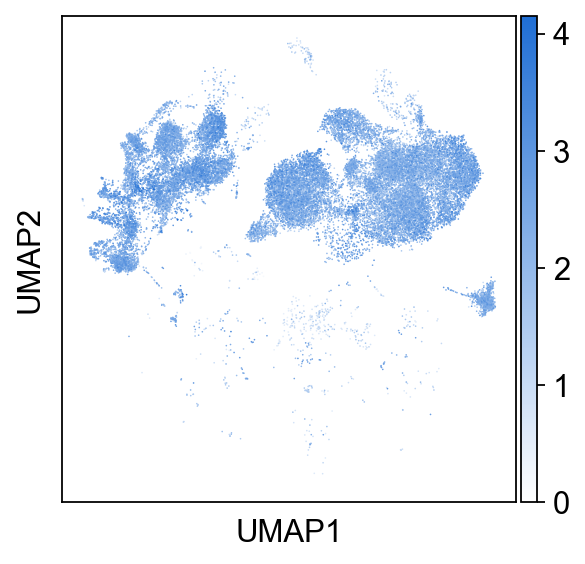

In [38]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#1F6ED4')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='CD3D', ncols=1, cmap=color_loc_1, title='', wspace=0.15, frameon=True, show=True, save="_annotation_01_CD3D_v1.pdf")

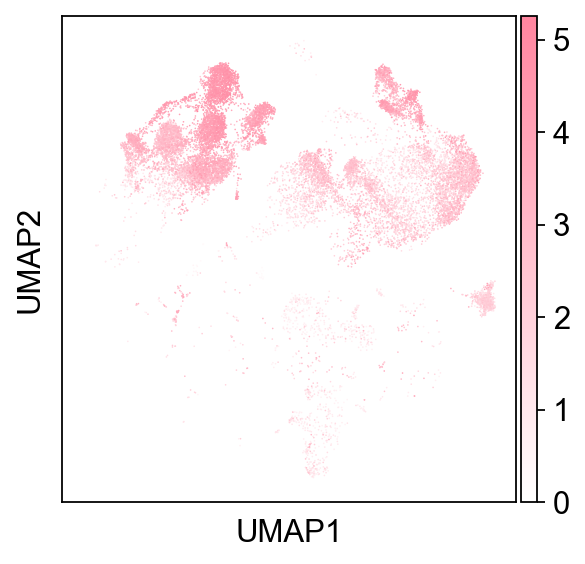

In [39]:
color_loc_2 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#FF859F')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='NKG7', ncols=1, cmap=color_loc_2, title='', wspace=0.15, frameon=True, show=True, save="_annotation_02_NKG7_v1.pdf")

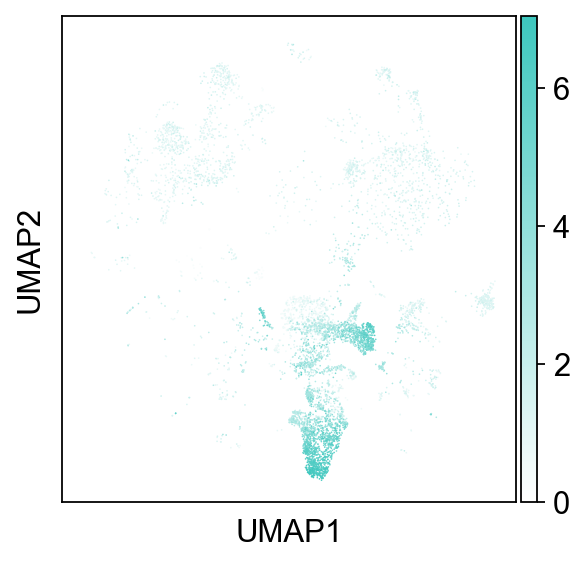

In [40]:
color_loc_3 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#3DC7BE')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='S100A9', ncols=1, cmap=color_loc_3, title='', wspace=0.15, frameon=True, show=True, save="_annotation_03_S100A9_v1.pdf")

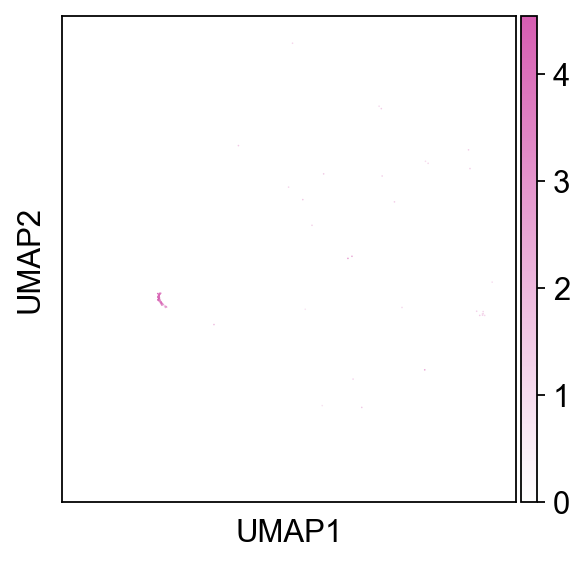

In [41]:
color_loc_4 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#D65DB1')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='CPA3', ncols=1, cmap=color_loc_4, title='', wspace=0.15, frameon=True, show=True, save="_annotation_04_CPA3_v1.pdf")

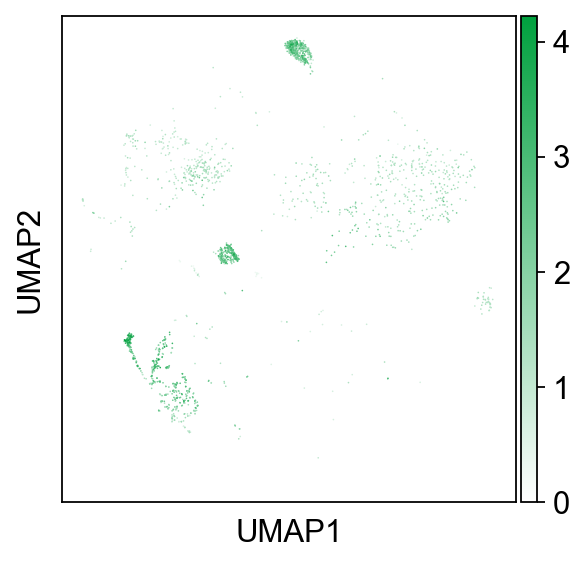

In [42]:
color_loc_5 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#00a03e')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='MS4A1', ncols=1, cmap=color_loc_5, title='', wspace=0.15, frameon=True, show=True, save="_annotation_05_MS4A1_v1.pdf")

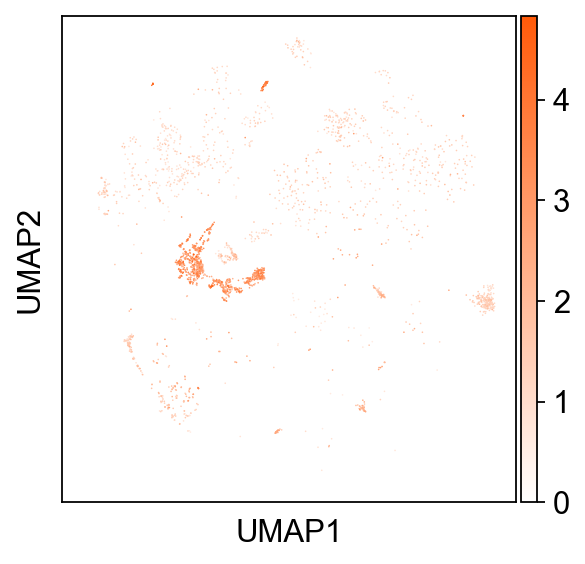

In [43]:
color_loc_6 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#FF5A09')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='MZB1', ncols=1, cmap=color_loc_6, title='', wspace=0.15, frameon=True, show=True, save="_annotation_06_MZB1_v1.pdf")

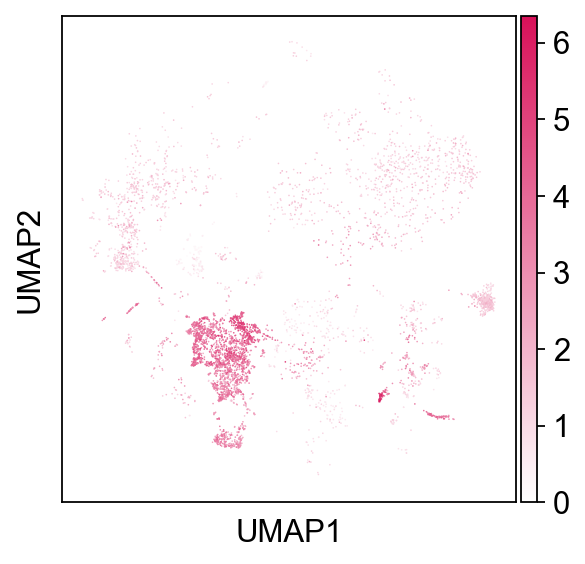

In [44]:
color_loc_7 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#D81159')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='KRT18', ncols=1, cmap=color_loc_7, title='', wspace=0.15, frameon=True, show=True, save="_annotation_07_KRT18_v1.pdf")

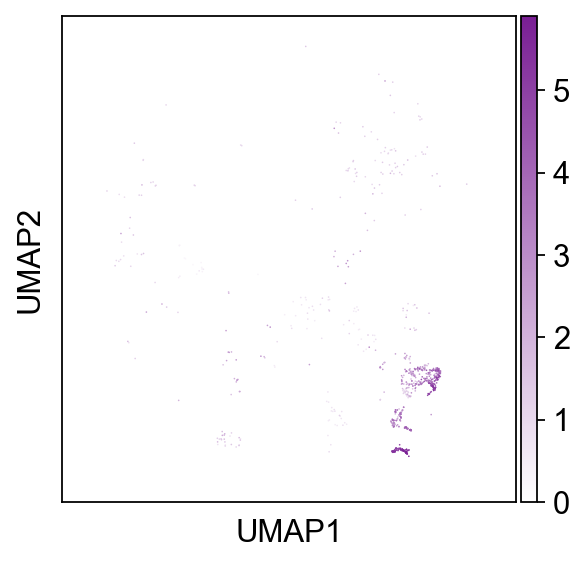

In [45]:
color_loc_8 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#791E94')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='DCN', ncols=1, cmap=color_loc_8, title='', wspace=0.15, frameon=True, show=True, save="_annotation_08_DCN_v1.pdf")

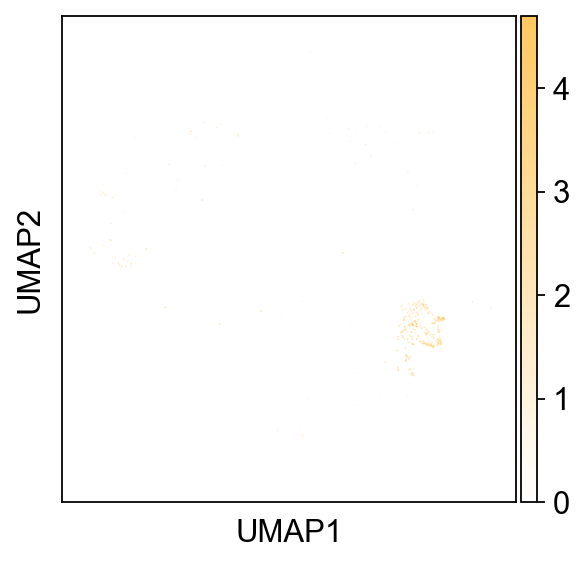

In [46]:
color_loc_9 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#FFC75F')], N=256)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color='CLDN5', ncols=1, cmap=color_loc_9, title='', wspace=0.15, frameon=True, show=True, save="_annotation_09_CLDN5_v1.pdf")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_anno']`


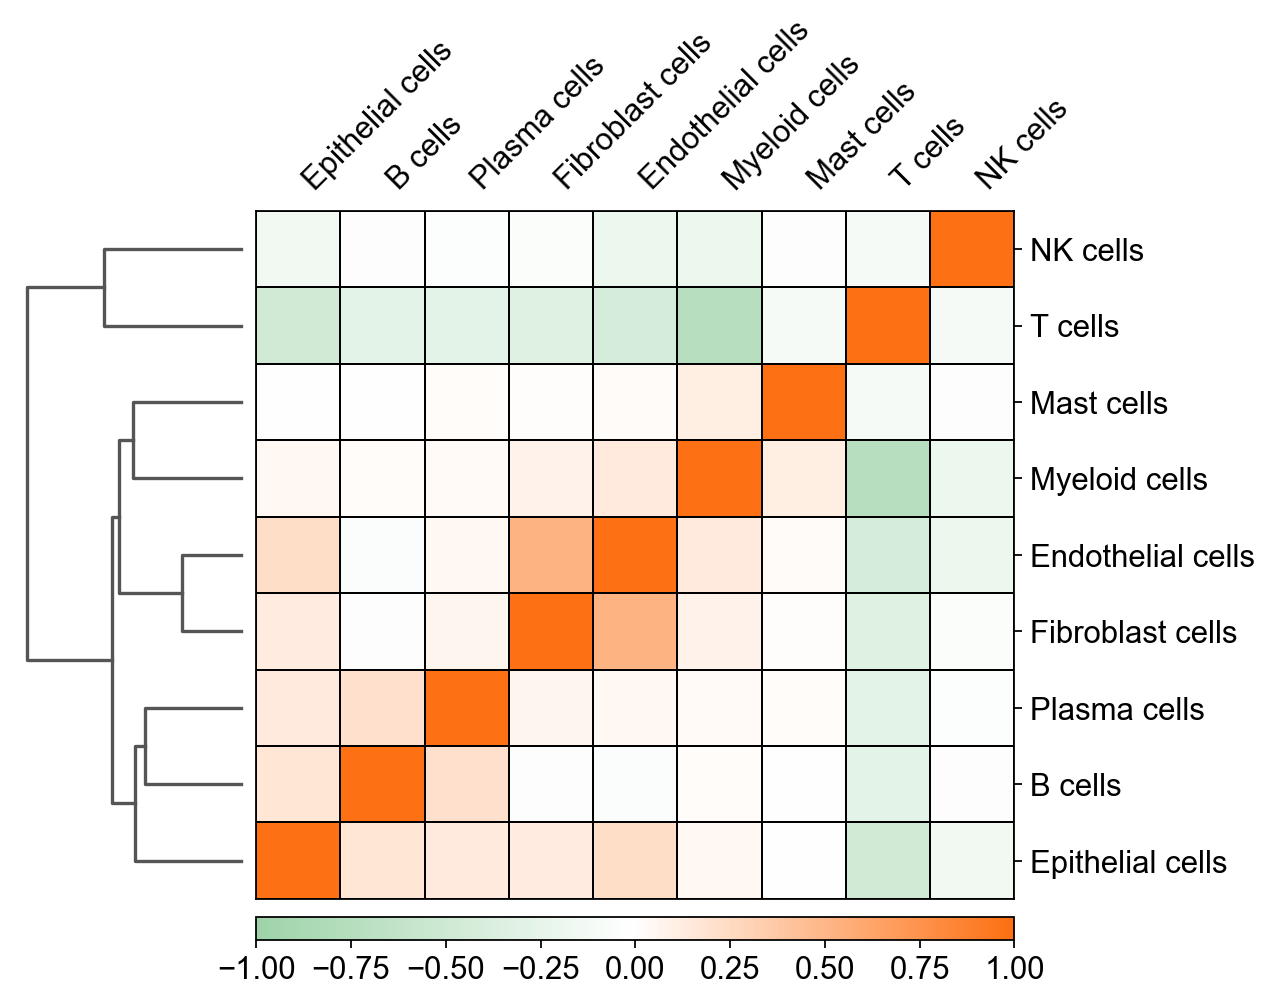

In [47]:
green_color_normal = mpl.colors.LinearSegmentedColormap.from_list('color', 
                                             [(0,    '#9dd3a8'),
                                              (0.5,  '#FFFFFF'),
                                              (1,    '#FD7013')], N=256)
                                              
sc.tl.dendrogram(adata, 'louvain_anno', n_pcs=50)
sc.pl.correlation_matrix(adata, 'louvain_anno', cmap=green_color_normal, figsize=(8, 6), show=True, save='_01_louvain_anno_correlation.pdf')

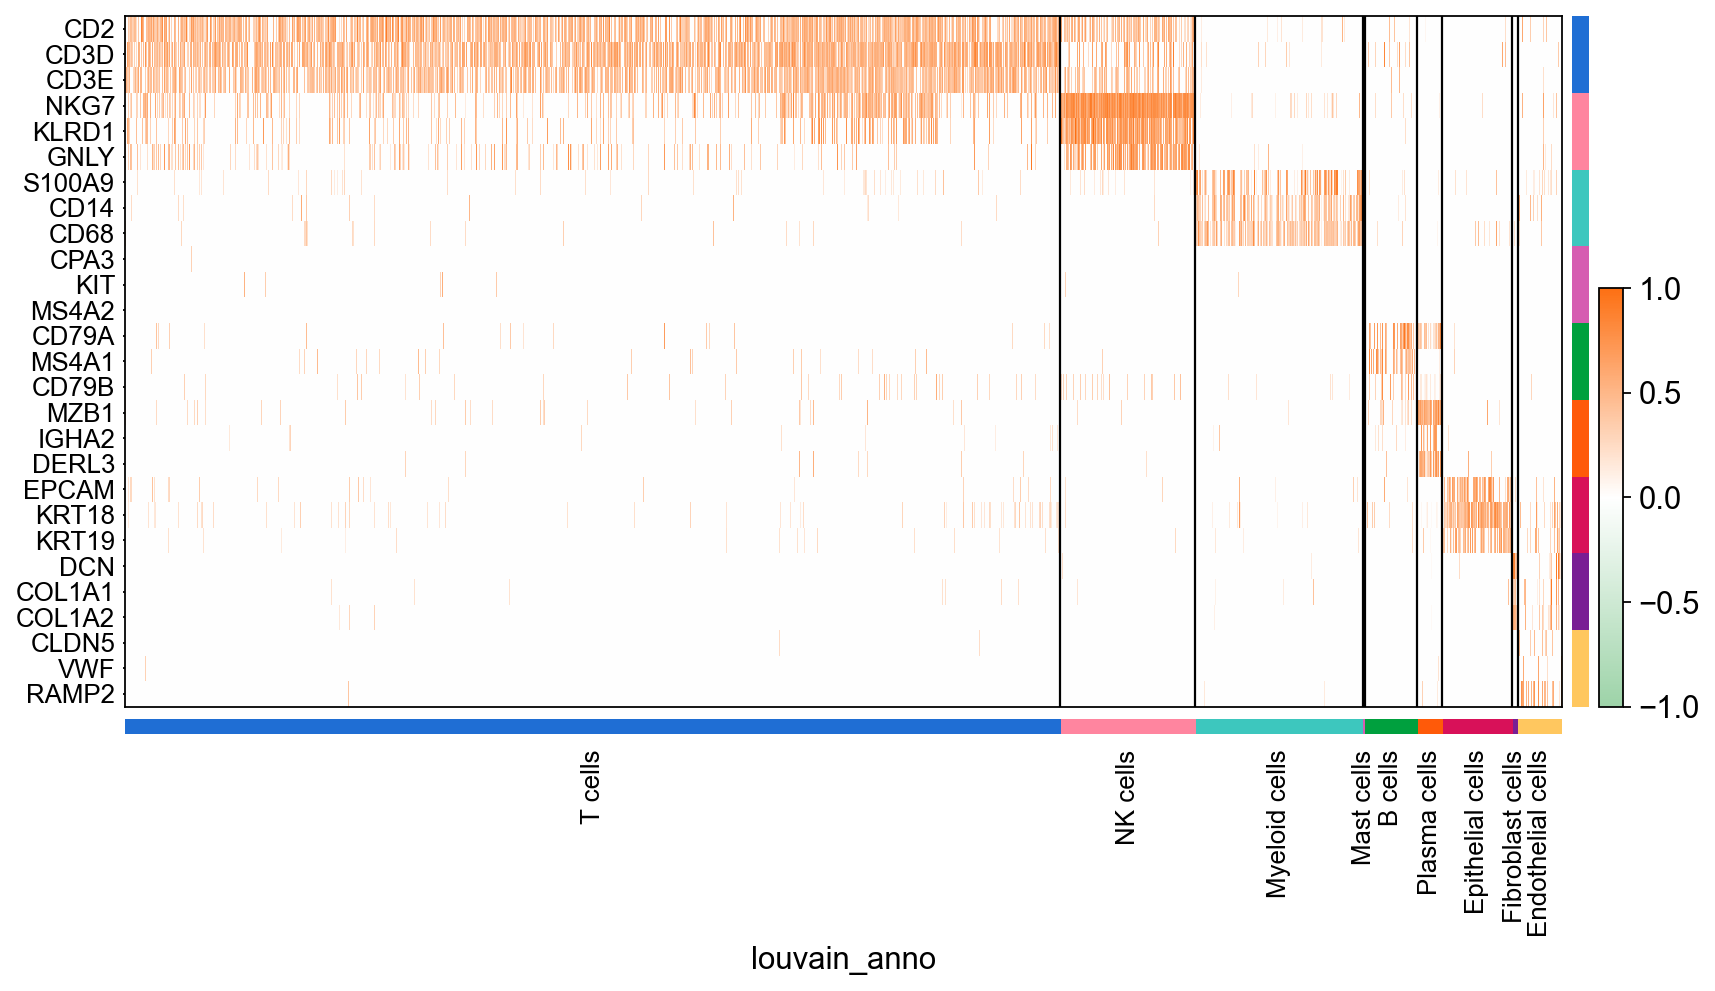

In [48]:
with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.heatmap(adata, marker_genes_dict, groupby='louvain_anno', show_gene_labels=True, figsize=(12, 6), 
        swap_axes=True, vmax=1, vmin=-1, cmap=green_color_normal, standard_scale='var', dendrogram=False, save='_01_louvain_anno.pdf')

ranking genes


/Users/xuewei/ZeroData/softwares/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:13)


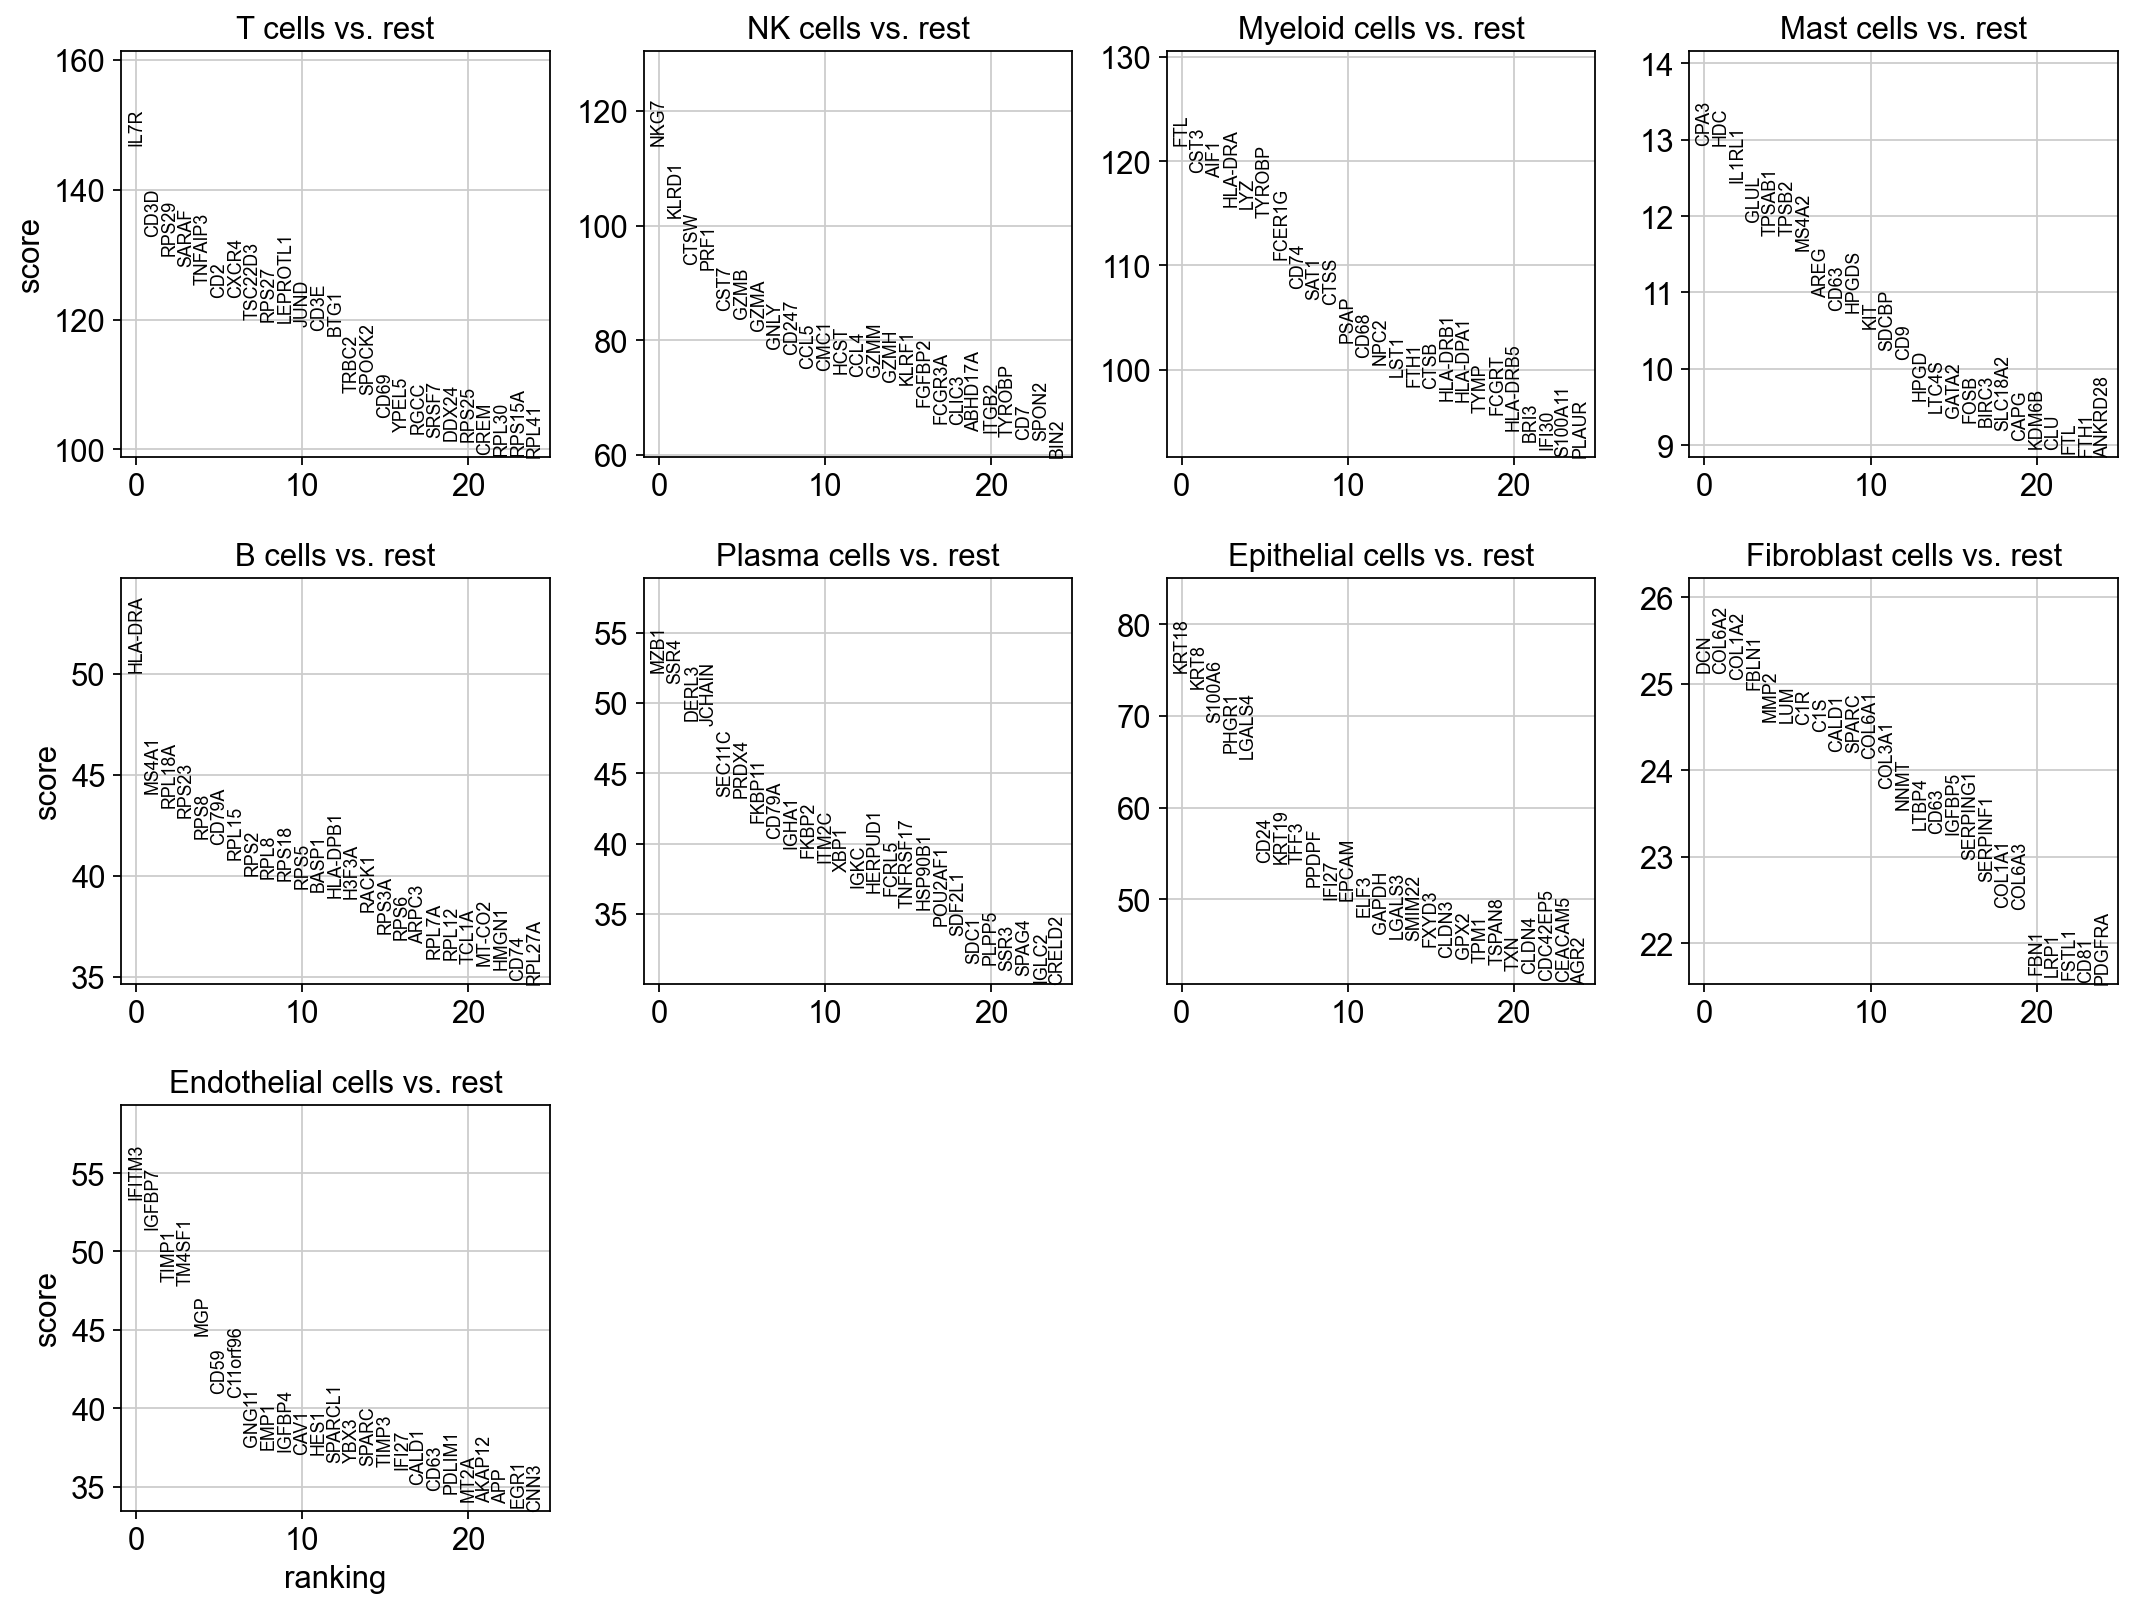

In [49]:
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'louvain_anno', method='wilcoxon', pts=True)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True)

res = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(500)
res.to_csv("/Users/xuewei/ZxProjects/LUAD/20230824_CellDeathDis_MPLCs/01_preprocessing/04_Cell_Atlas/DEGs_top500.csv")

In [50]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

res = pd.DataFrame(    
    {group + '_' + key: result[key][group]
     for group in groups for key in ['names', 'pvals', 'logfoldchanges', 'pvals_adj', 'scores']})
res.to_csv("/Users/xuewei/ZxProjects/LUAD/20230824_CellDeathDis_MPLCs/01_preprocessing/04_Cell_Atlas/DEGs_all.csv")

In [51]:
res = sc.get.rank_genes_groups_df(adata, group='Myeloid cells')
res.to_csv("diff_03_Myeloid_cells_df.csv")

from gprofiler import GProfiler
res = sc.queries.enrich(adata, "NK cells")
res.to_csv("diff_03_Myeloid_cells_enrich.csv")

In [52]:
# from cycler import cycler
# with rc_context({'figure.figsize': (6, 3), 'figure.facecolor': '#FFFFFF', 'savefig.dpi': '300', 'axes.grid': 'False', 'legend.loc':'best',
# 'axes.prop_cycle': cycler(color=['#F75940', '#42218E']), 'axes.labelcolor': '#000000', }):
#     sc.pl.rank_genes_groups_violin(adata, groups=['Primary', 'Metastasis'], n_genes=10, strip=False, jitter=0, show=True)

In [53]:
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, groupby='louvain_anno', method='wilcoxon')
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, max_out_group_fraction=0.5, min_fold_change=0.5)
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('purple', [(0, '#FFFFFF'), (1, '#FD7013')], N=256)

ranking genes


/Users/xuewei/ZeroData/softwares/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:59)
Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: 0.5, max_out_group_fraction: 0.5


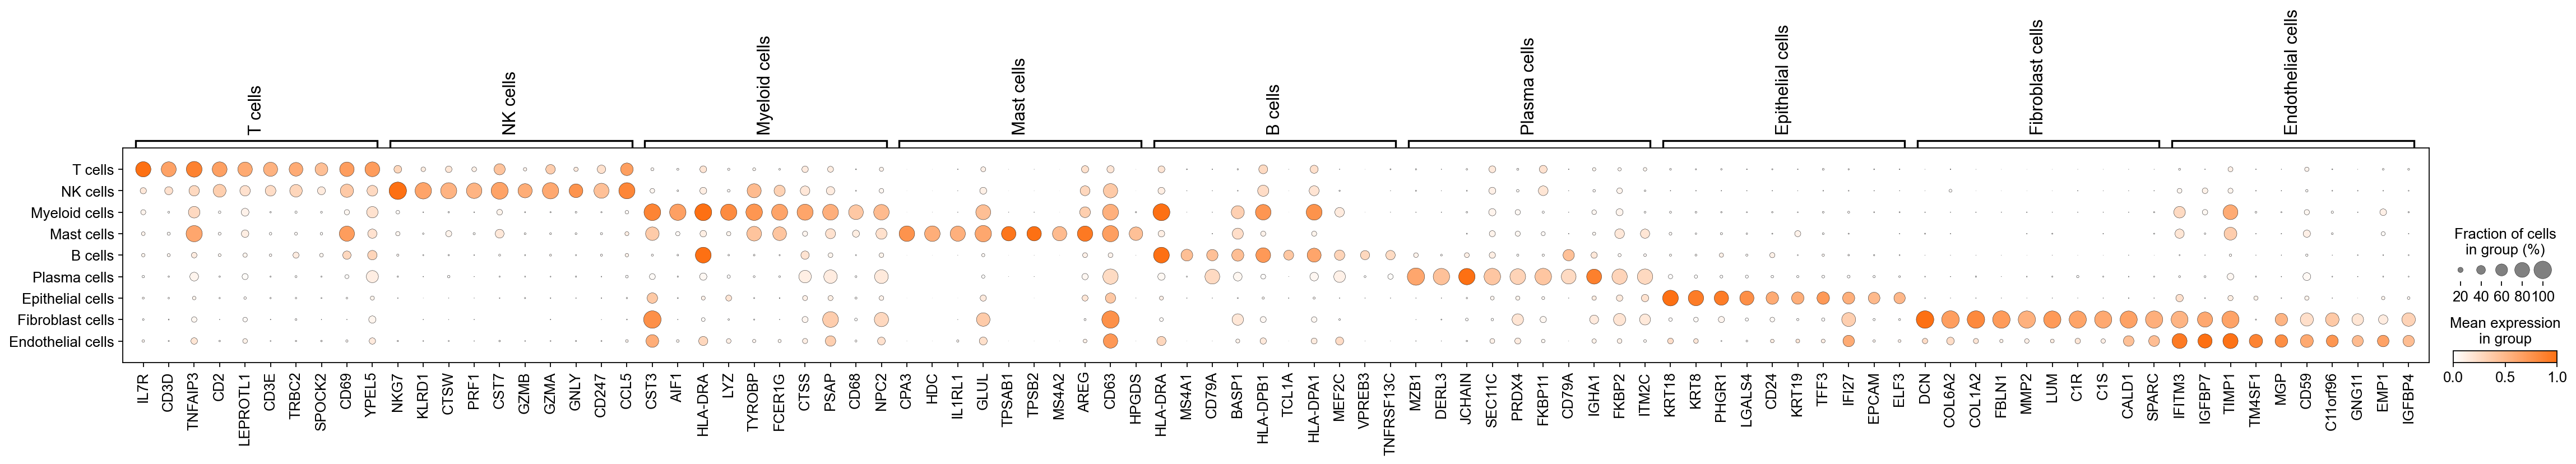

In [54]:
with rc_context({'figure.figsize': (12, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.rank_genes_groups_dotplot(adata, n_genes=10, key='rank_genes_groups_filtered', cmap=color_loc_1, 
                                    dendrogram=False, standard_scale='group', save='03_rank_genes_louvain_anno.pdf')

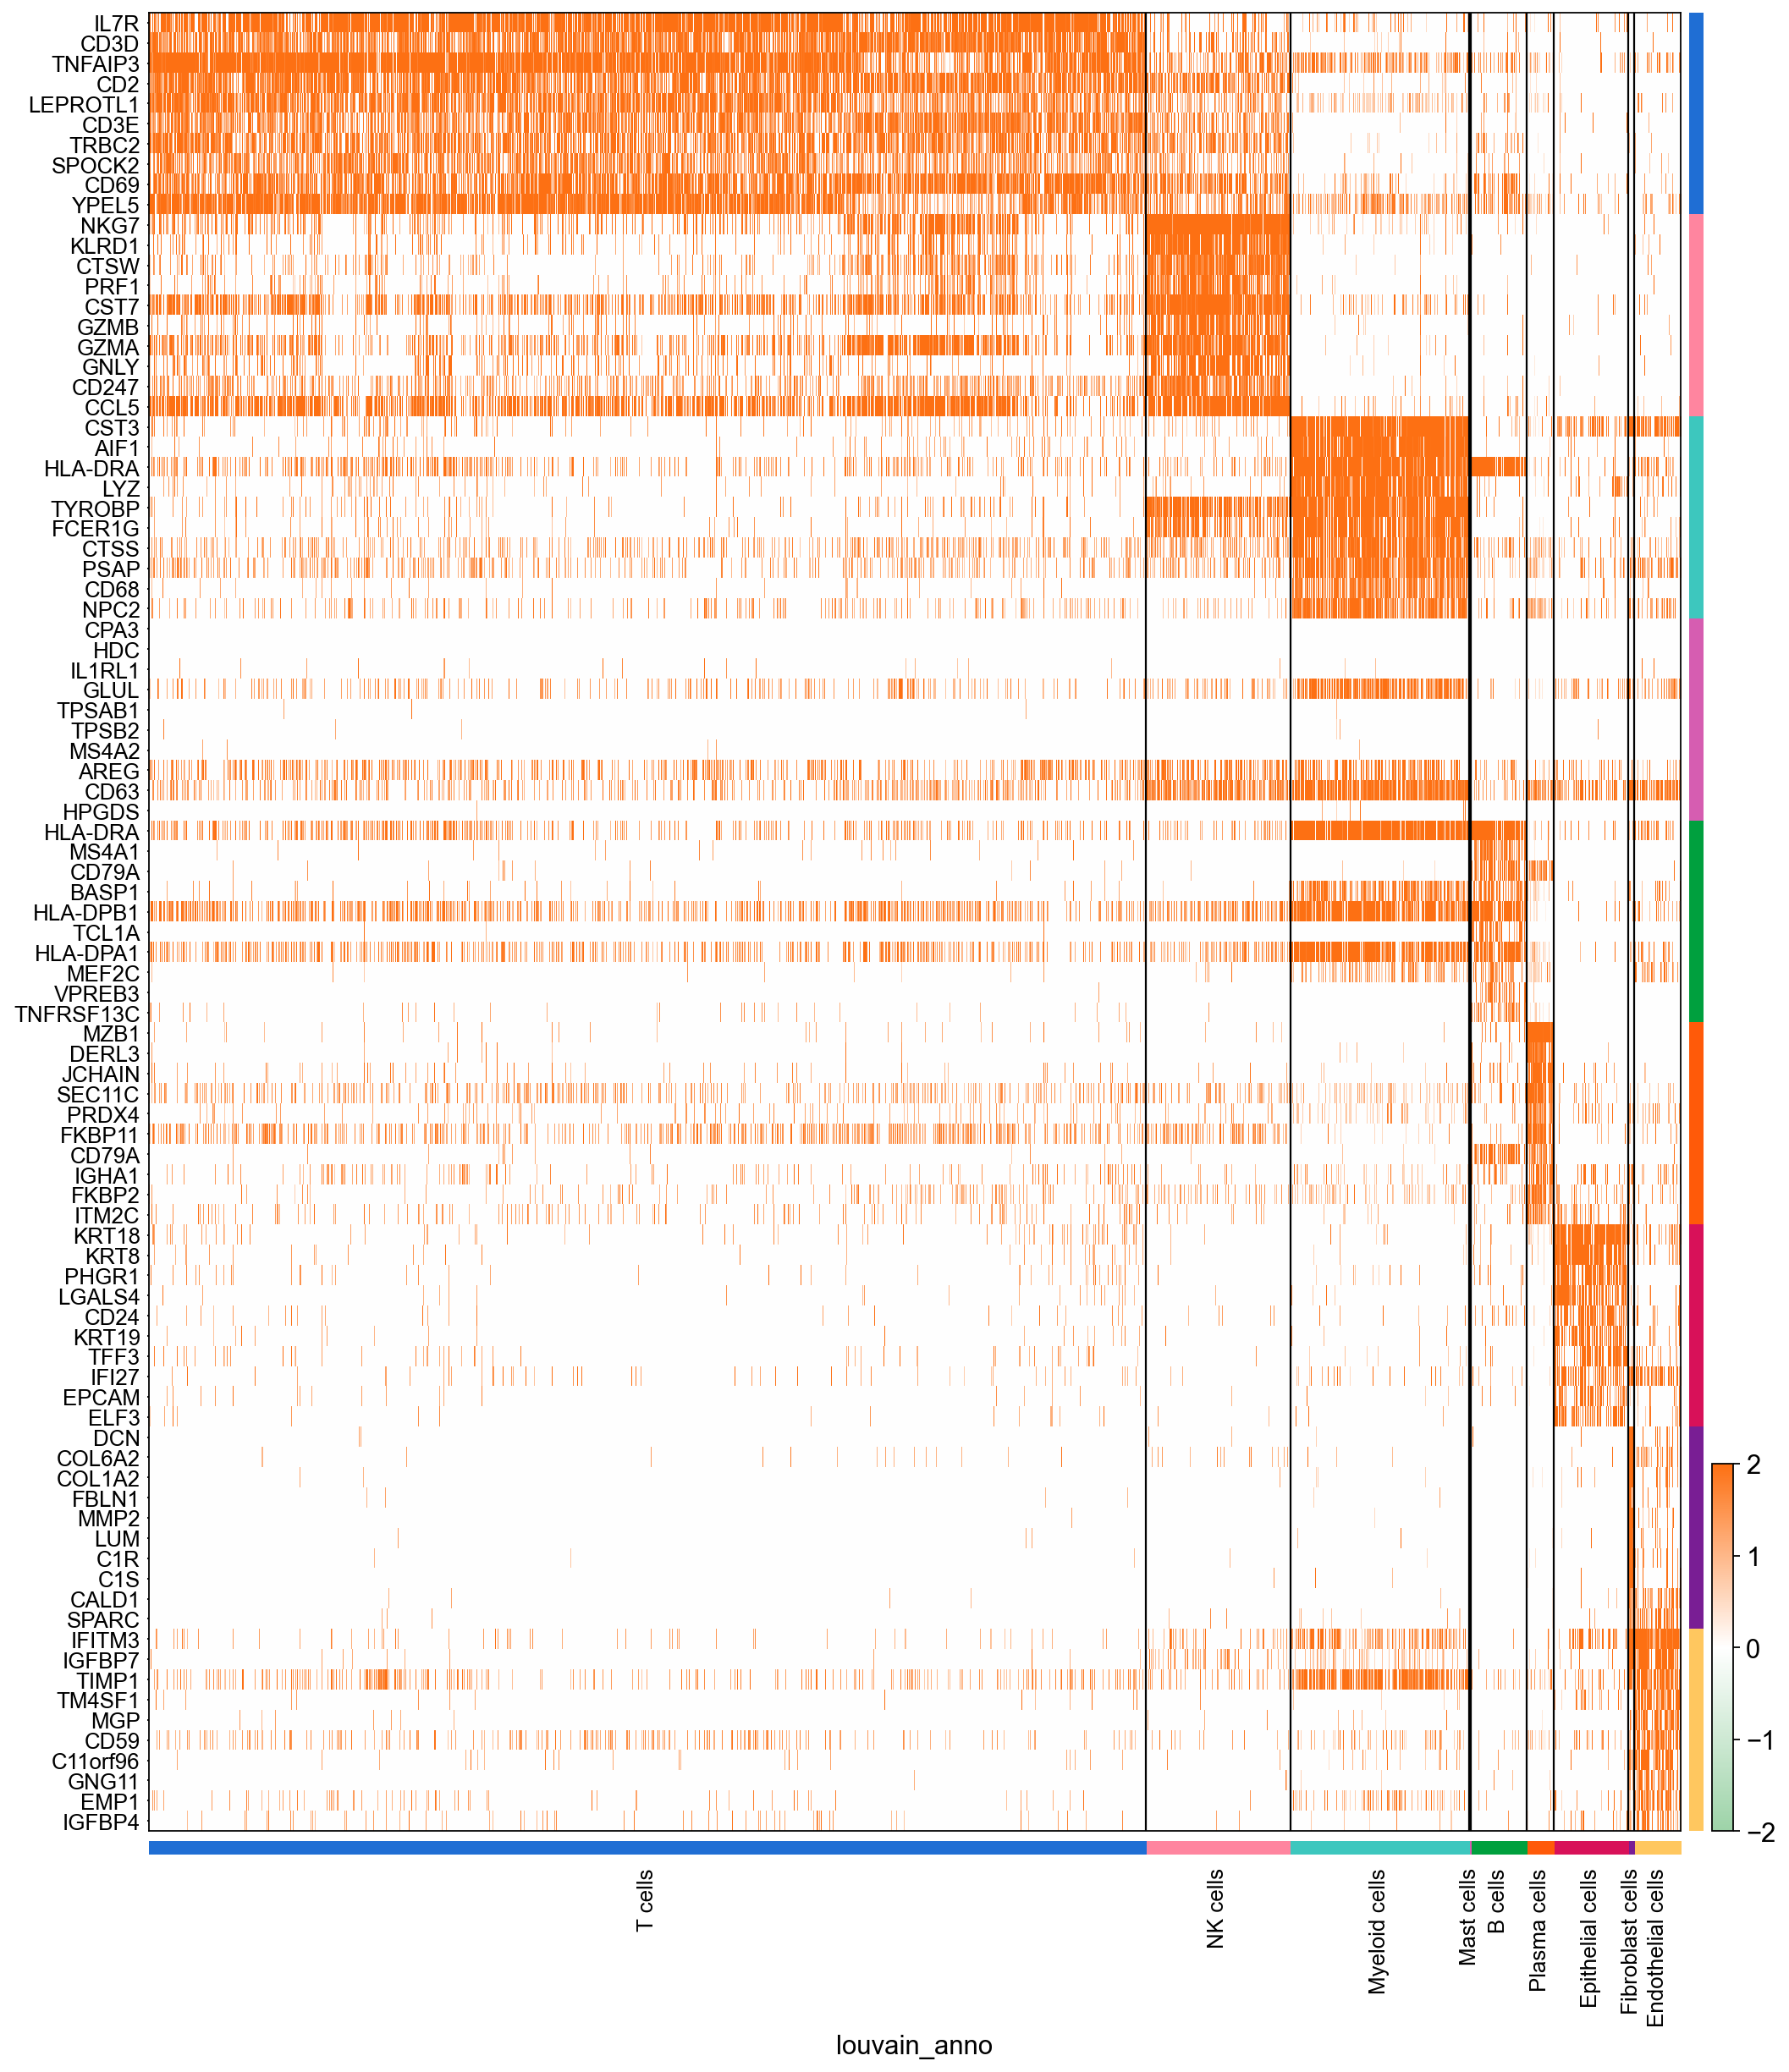

In [55]:
color_normal = mpl.colors.LinearSegmentedColormap.from_list('color', 
                                             [(0,    '#9dd3a8'),
                                              (0.5,  '#FFFFFF'),
                                              (1,    '#FD7013')], N=256)

with rc_context({'figure.figsize': (15, 18), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
   sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, key='rank_genes_groups_filtered', show_gene_labels=True, figsize=(15, 18), 
                                   use_raw=True, swap_axes=True, vmax=2, vmin=-2, cmap=color_normal, dendrogram=False, save='_02_rank_genes_louvain_anno.pdf')